In [226]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt

os.chdir("/Users/jacobrichards/Desktop/DS_DA_Projects/Marketing_Prediction")

data = pd.read_csv("data.csv", na_values=["", "NA"])

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = [8, 6]  # Default figure size
plt.rcParams['figure.dpi'] = 100  # Controls display resolution

# Investigation of Logistic Regression model performance

In diagnosing why the Logistic Regression model failed to make accurate predictions, we can study first-hand the best practices and proper utilization of Logistic Regression models.

The model performs binary classification to predict whether an individual will respond to an advertisement campaign based on individual characteristics such as age, distance from sales location, income bracket, gender, and marital status.

In [227]:
display(data.head())

id  age      dist       income gender marital_status  target
0   1   73  4.371654    90-99,999      M              S       1
1   2   89  1.582733  100-149,999      M            NaN       1
2   3   85  1.223810    10-19,999      F              S       1
3   4   76  2.962427    90-99,999      M              M       1
4   5   76  2.594408    10-19,999      M              S       1

# clean data 

In [228]:
import pandas as pd
import numpy as np

# Replace missing or empty values in columns 4, 5, 6 with "unknown"
data.iloc[:, [3, 4, 5]] = data.iloc[:, [3, 4, 5]].applymap(lambda x: "unknown" if pd.isna(x) or x == "" else x)

# Replace income with appropriate midpoints or custom values
income_mapping = {
    "unknown": 6,              # replacing unknown with the median income level
    "Under $10k": 1,            # midpoint of "Under $10k"
    "10-19,999": 2,            # midpoint of "10-19,999"
    "20-29,999": 3,            # midpoint of "20-29,999"
    "30-39,999": 4,            # midpoint of "30-39,999"
    "40-49,999": 5,            # midpoint of "40-49,999"
    "50-59,999": 6,            # midpoint of "50-59,999"
    "60-69,999": 7,            # midpoint of "60-69,999"
    "70-79,999": 8,            # midpoint of "70-79,999"
    "80-89,999": 9,            # midpoint of "80-89,999"
    "90-99,999": 10,            # midpoint of "90-99,999"
    "100-149,999": 11,         # midpoint of "100-149,999"
    "150 - 174,999": 12,       # midpoint of "150 - 174,999"
    "175 - 199,999": 13,       # midpoint of "175 - 199,999"
    "200 - 249,999": 14,       # midpoint of "200 - 249,999"
    "250k+": 15               # custom value for "250k+"
}
data["income"] = data["income"].map(income_mapping).astype(int)

# Replace gender with 1 for male, 0 for female, and 0 for unknown
gender_mapping = {"M": 1, "F": 0, "unknown": 0}
data["gender"] = data["gender"].map(gender_mapping).astype(int)

# Replace marital_status with 1 for married, 0 for single, and 1 for unknown
marital_status_mapping = {"M": 1, "S": 0, "unknown": 1}
data["marital_status"] = data["marital_status"].map(marital_status_mapping).astype(int)

# Convert target to categorical values (0 or 1)
data["target"] = data["target"].astype(int)

# Convert distance (dist) column to integer
data["dist"] = data["dist"].astype(int)

Male is 1 and female is 0, married is 1 and single is 0, and response is 1 and no response is 0. 

In [229]:
display(data.head())

id  age  dist  income  gender  marital_status  target
0   1   73     4      10       1               0       1
1   2   89     1      11       1               1       1
2   3   85     1       2       0               0       1
3   4   76     2      10       1               1       1
4   5   76     2       2       1               0       1

# Evaluate Logistic Regression

Optimization terminated successfully.
         Current function value: 0.521321
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                 3200
Model:                          Logit   Df Residuals:                     3194
Method:                           MLE   Df Model:                            5
Date:                Mon, 23 Dec 2024   Pseudo R-squ.:                 0.06309
Time:                        18:00:18   Log-Likelihood:                -1668.2
converged:                       True   LL-Null:                       -1780.6
Covariance Type:            nonrobust   LLR p-value:                 1.494e-46
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -4.5569      0.453    -10.067      0.000      -5.444      -3.670
age              

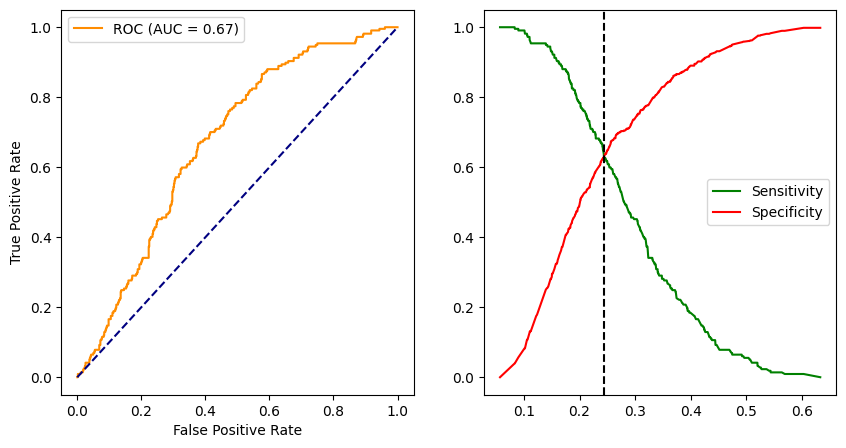

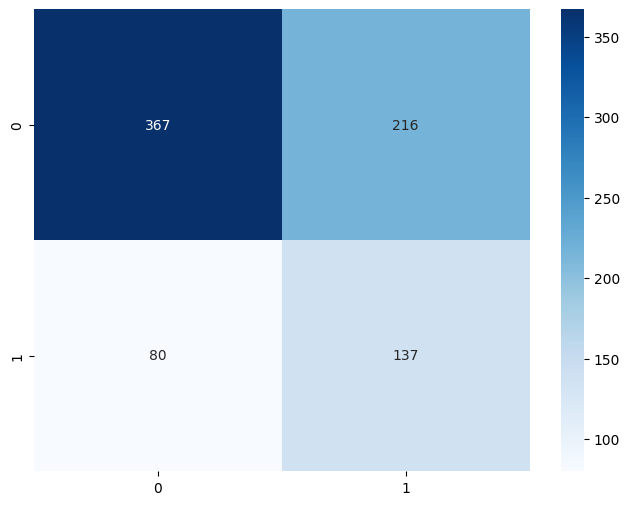

Optimization terminated successfully.
         Current function value: 0.527865
         Iterations 6


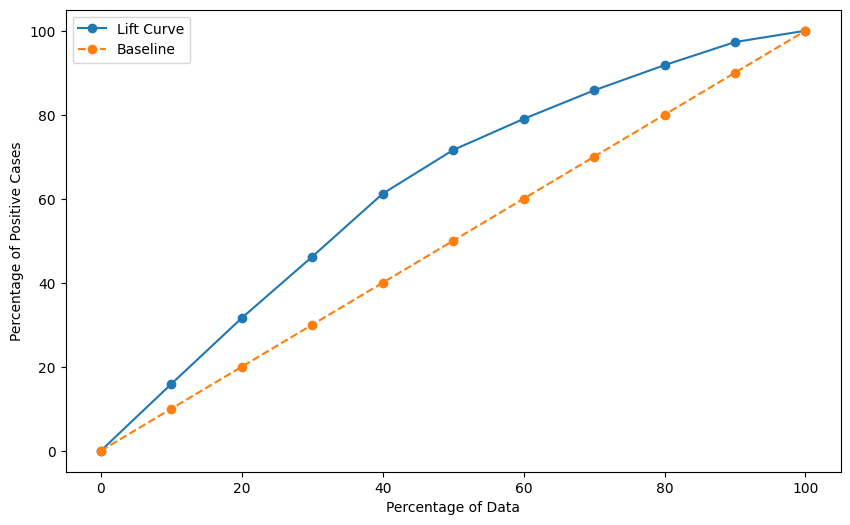


Top predictions:


id  age  dist  income  gender  marital_status  target  predicted_probs
3917  3918   94     1       2       1               1       0         0.648670
2393  2394   94     2       2       1               1       1         0.645755
442    443   94     3       2       1               1       1         0.642830
862    863   90     2       1       1               1       0         0.628367
460    461   92     1       2       1               1       1         0.627109

id  age  dist  income  gender  marital_status  target  predicted_probs
555    556   77     5      11       0               0       0         0.111251
3491  3492   82     3      11       1               1       1         0.273661
527    528   80     3      11       0               1       0         0.186317
3925  3926   73     1       3       1               0       0         0.285578
2989  2990   69     5       2       1               1       0         0.353224

In [230]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import roc_curve, auc, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

X = sm.add_constant(data[['age', 'dist', 'income', 'gender', 'marital_status']])
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = sm.Logit(y_train, X_train).fit()
y_pred_proba = model.predict(X_test)

print(model.summary())
print(f"\nTraining Accuracy: {(model.predict(X_train) > 0.5).mean():.3f}")
print(f"Testing Accuracy: {(y_pred_proba > 0.5).mean():.3f}")

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
optimal_threshold = thresholds[np.argmin(np.abs(tpr - (1-fpr)))]
y_pred_optimal = (y_pred_proba >= optimal_threshold).astype(int)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.plot(fpr, tpr, color='darkorange', label=f'ROC (AUC = {auc(fpr, tpr):.2f})')
ax1.plot([0, 1], [0, 1], color='navy', linestyle='--')
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.legend()

ax2.plot(thresholds, tpr, label='Sensitivity', color='green')
ax2.plot(thresholds, 1-fpr, label='Specificity', color='red')
ax2.axvline(x=optimal_threshold, color='black', linestyle='--')
ax2.legend()
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_optimal), annot=True, fmt='d', cmap='Blues')
plt.show()

model_full = sm.Logit(y, sm.add_constant(data[['age', 'income', 'dist', 'gender', 'marital_status']])).fit()
data['predicted_probs'] = model_full.predict(sm.add_constant(data[['age', 'income', 'dist', 'gender', 'marital_status']]))
data_sorted = data.sort_values('predicted_probs', ascending=False)
data_shuffled = data.sample(frac=1, random_state=42)

total_pos = data_sorted['target'].sum()
n_rows = len(data_sorted)
deciles = np.linspace(0, n_rows, 11, dtype=int)
lift_curve = [data_sorted.iloc[:i]['target'].sum() / total_pos * 100 for i in deciles]
baseline = np.linspace(0, 100, 11)

plt.figure(figsize=(10, 6))
plt.plot(baseline, lift_curve, label='Lift Curve', marker='o')
plt.plot(baseline, baseline, label='Baseline', linestyle='--', marker='o')
plt.xlabel('Percentage of Data')
plt.ylabel('Percentage of Positive Cases')
plt.legend()
plt.show()

print("\nTop predictions:")
display(data_sorted.head())
display(data_shuffled.head())

Optimization terminated successfully.
         Current function value: 0.542901
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.535794
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.539265
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.541956
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.547609
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.559628
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.560484
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.545148
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.543849
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.558019
  

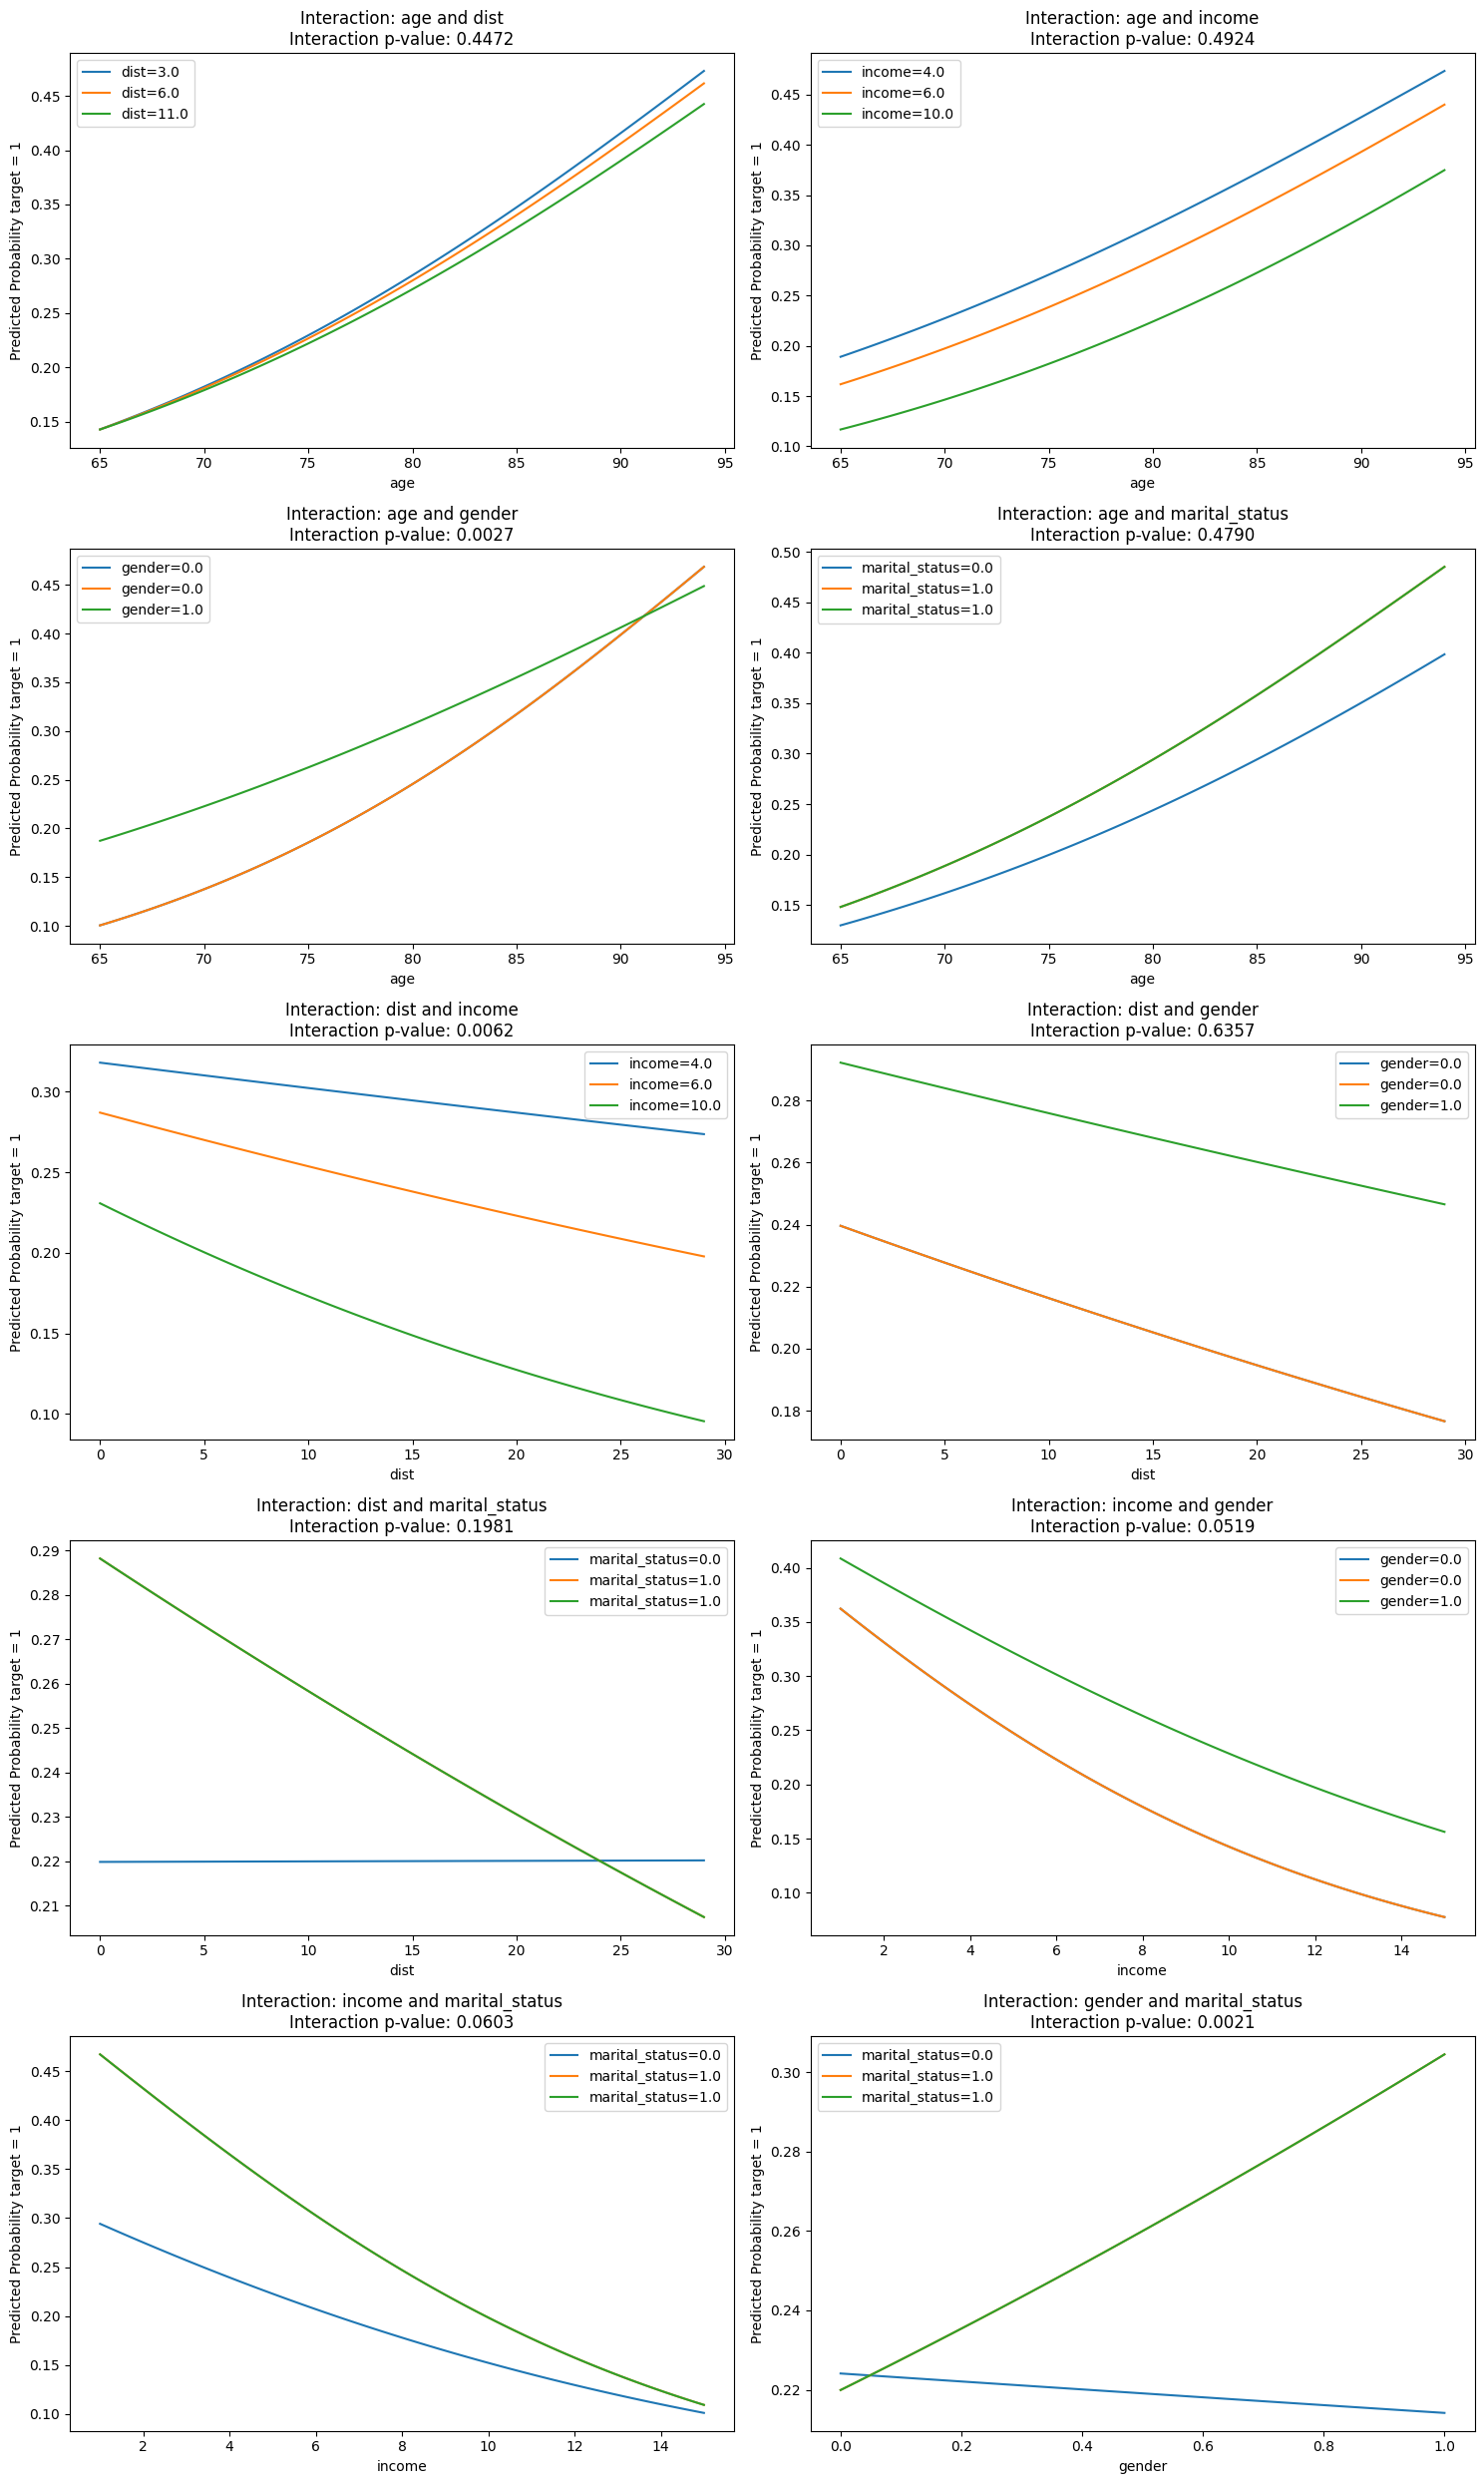


Significant interactions (p < 0.05):
age x gender
dist x income
gender x marital_status


In [231]:
variables = ['age', 'dist', 'income', 'gender', 'marital_status']

n_pairs = len(variables) * (len(variables) - 1) // 2
n_rows = (n_pairs + 1) // 2
fig, axes = plt.subplots(n_rows, 2, figsize=(15, 5*n_rows))
axes = axes.flatten()

significant_interactions = []
plot_idx = 0

for i, var1 in enumerate(variables):
    for j, var2 in enumerate(variables[i+1:], i+1):
        formula = f'target ~ {var1} * {var2}'
        model = sm.Logit.from_formula(formula, data=data).fit()
        
        interaction_pvalue = model.pvalues[f'{var1}:{var2}']
        
        if interaction_pvalue < 0.05:
            significant_interactions.append((var1, var2))
        
        var1_values = np.linspace(data[var1].min(), data[var1].max(), 100)
        var2_levels = np.percentile(data[var2], [25, 50, 75])
        
        for var2_level in var2_levels:
            df = pd.DataFrame({
                var1: var1_values,
                var2: var2_level
            })
            df['interaction'] = df[var1] * df[var2]
            df['predicted_prob'] = model.predict(sm.add_constant(df))
            
            axes[plot_idx].plot(df[var1], df['predicted_prob'], 
                              label=f'{var2}={var2_level:.1f}')
        
        axes[plot_idx].set_xlabel(var1)
        axes[plot_idx].set_ylabel('Predicted Probability target = 1')
        axes[plot_idx].legend()
        axes[plot_idx].set_title(f'Interaction: {var1} and {var2}\nInteraction p-value: {interaction_pvalue:.4f}')
        plot_idx += 1

for idx in range(plot_idx, len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()

print("\nSignificant interactions (p < 0.05):")
for var1, var2 in significant_interactions:
    print(f"{var1} x {var2}")


The additon of interaction terms to the model improved models performance only trivally, as the variable in which there are interactions, the combinations of categories being male and married, were so highly associated with posative outcomes. That simply the association of male to posative outcomes and married to posative outcomes, was alost equivlent to actually producing terms to model such combinations seperately.

# Logistic Regression Performance.

The most important performance metric for in this context is our lift chart. We want to yeild the most customer responses while sampling the least percentage of potential customers. 
The logistic regression model obtained 70% of the totall responses from potential customers upon sampling 50% of them. This is very poor, as if we had sampled customers randomly we would have obtained 50% of the totall responses upon sampling 50% of them.

This performance metric is independent of decision threshold chosen, as the customers are sampled simply in order of greated predicted probability of response to least.

This is indicative of the models poor ability to predict posative responses.

# Evaluate Random Forest

Training Accuracy: 0.973
Testing Accuracy: 0.680


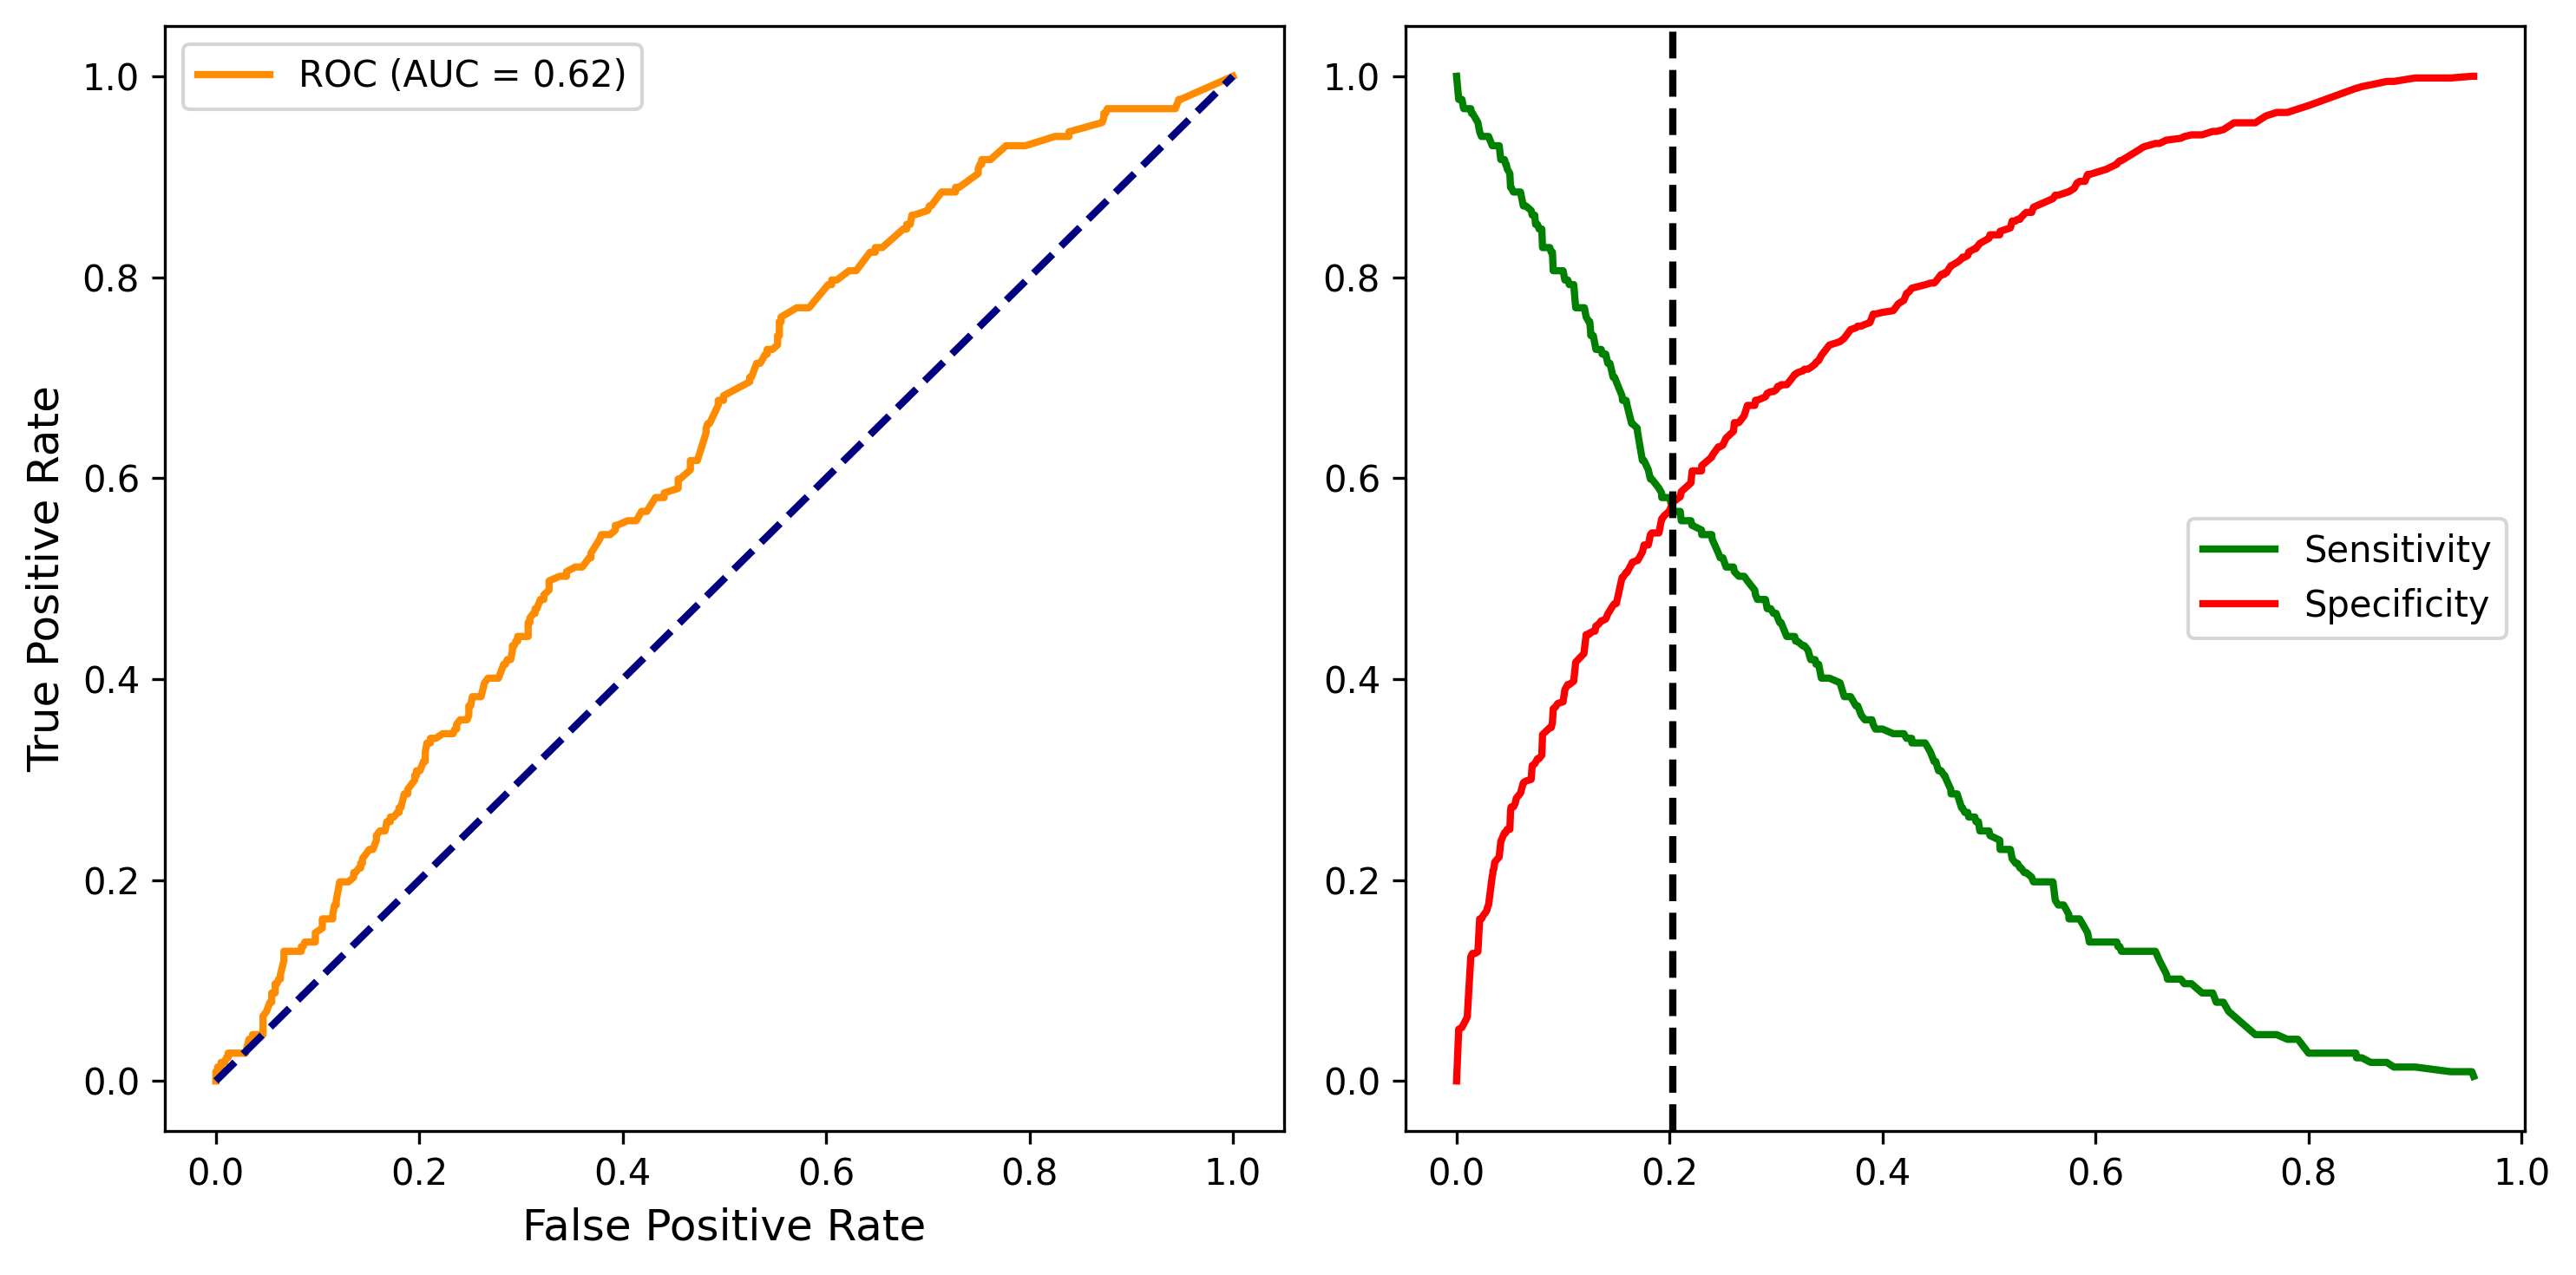

Optimal threshold: 0.203
Sensitivity: 0.567
Specificity: 0.576


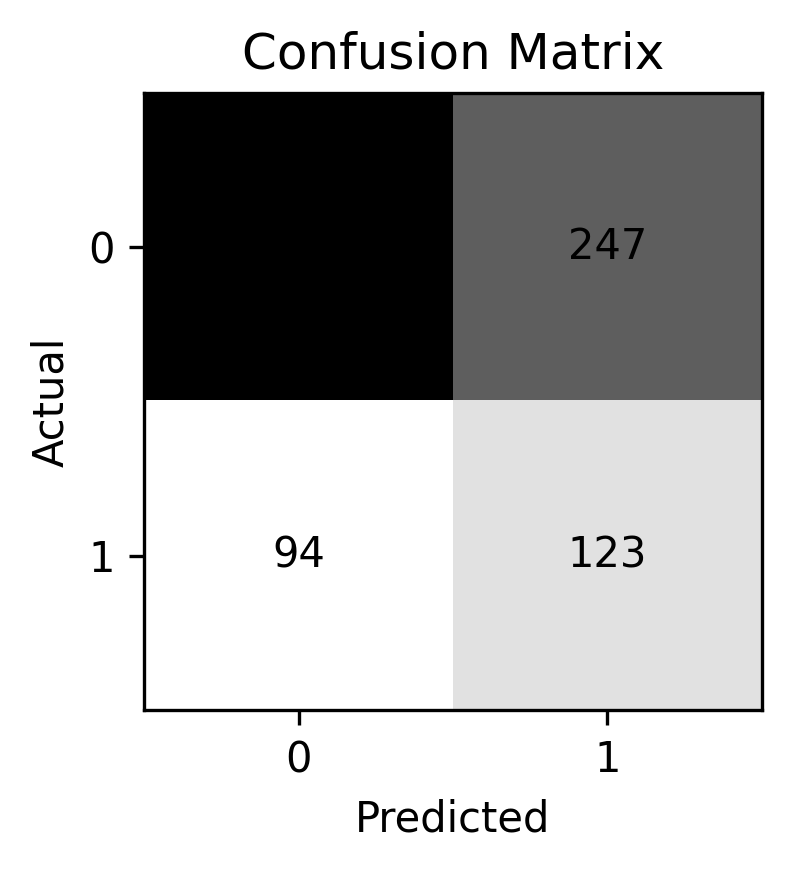

Lift Curve  Baseline
0          0.0         0
1         37.3        10
2         72.9        20
3         88.7        30
4         92.2        40
5         95.0        50
6         96.7        60
7         98.1        70
8         98.8        80
9         99.3        90
10       100.0       100

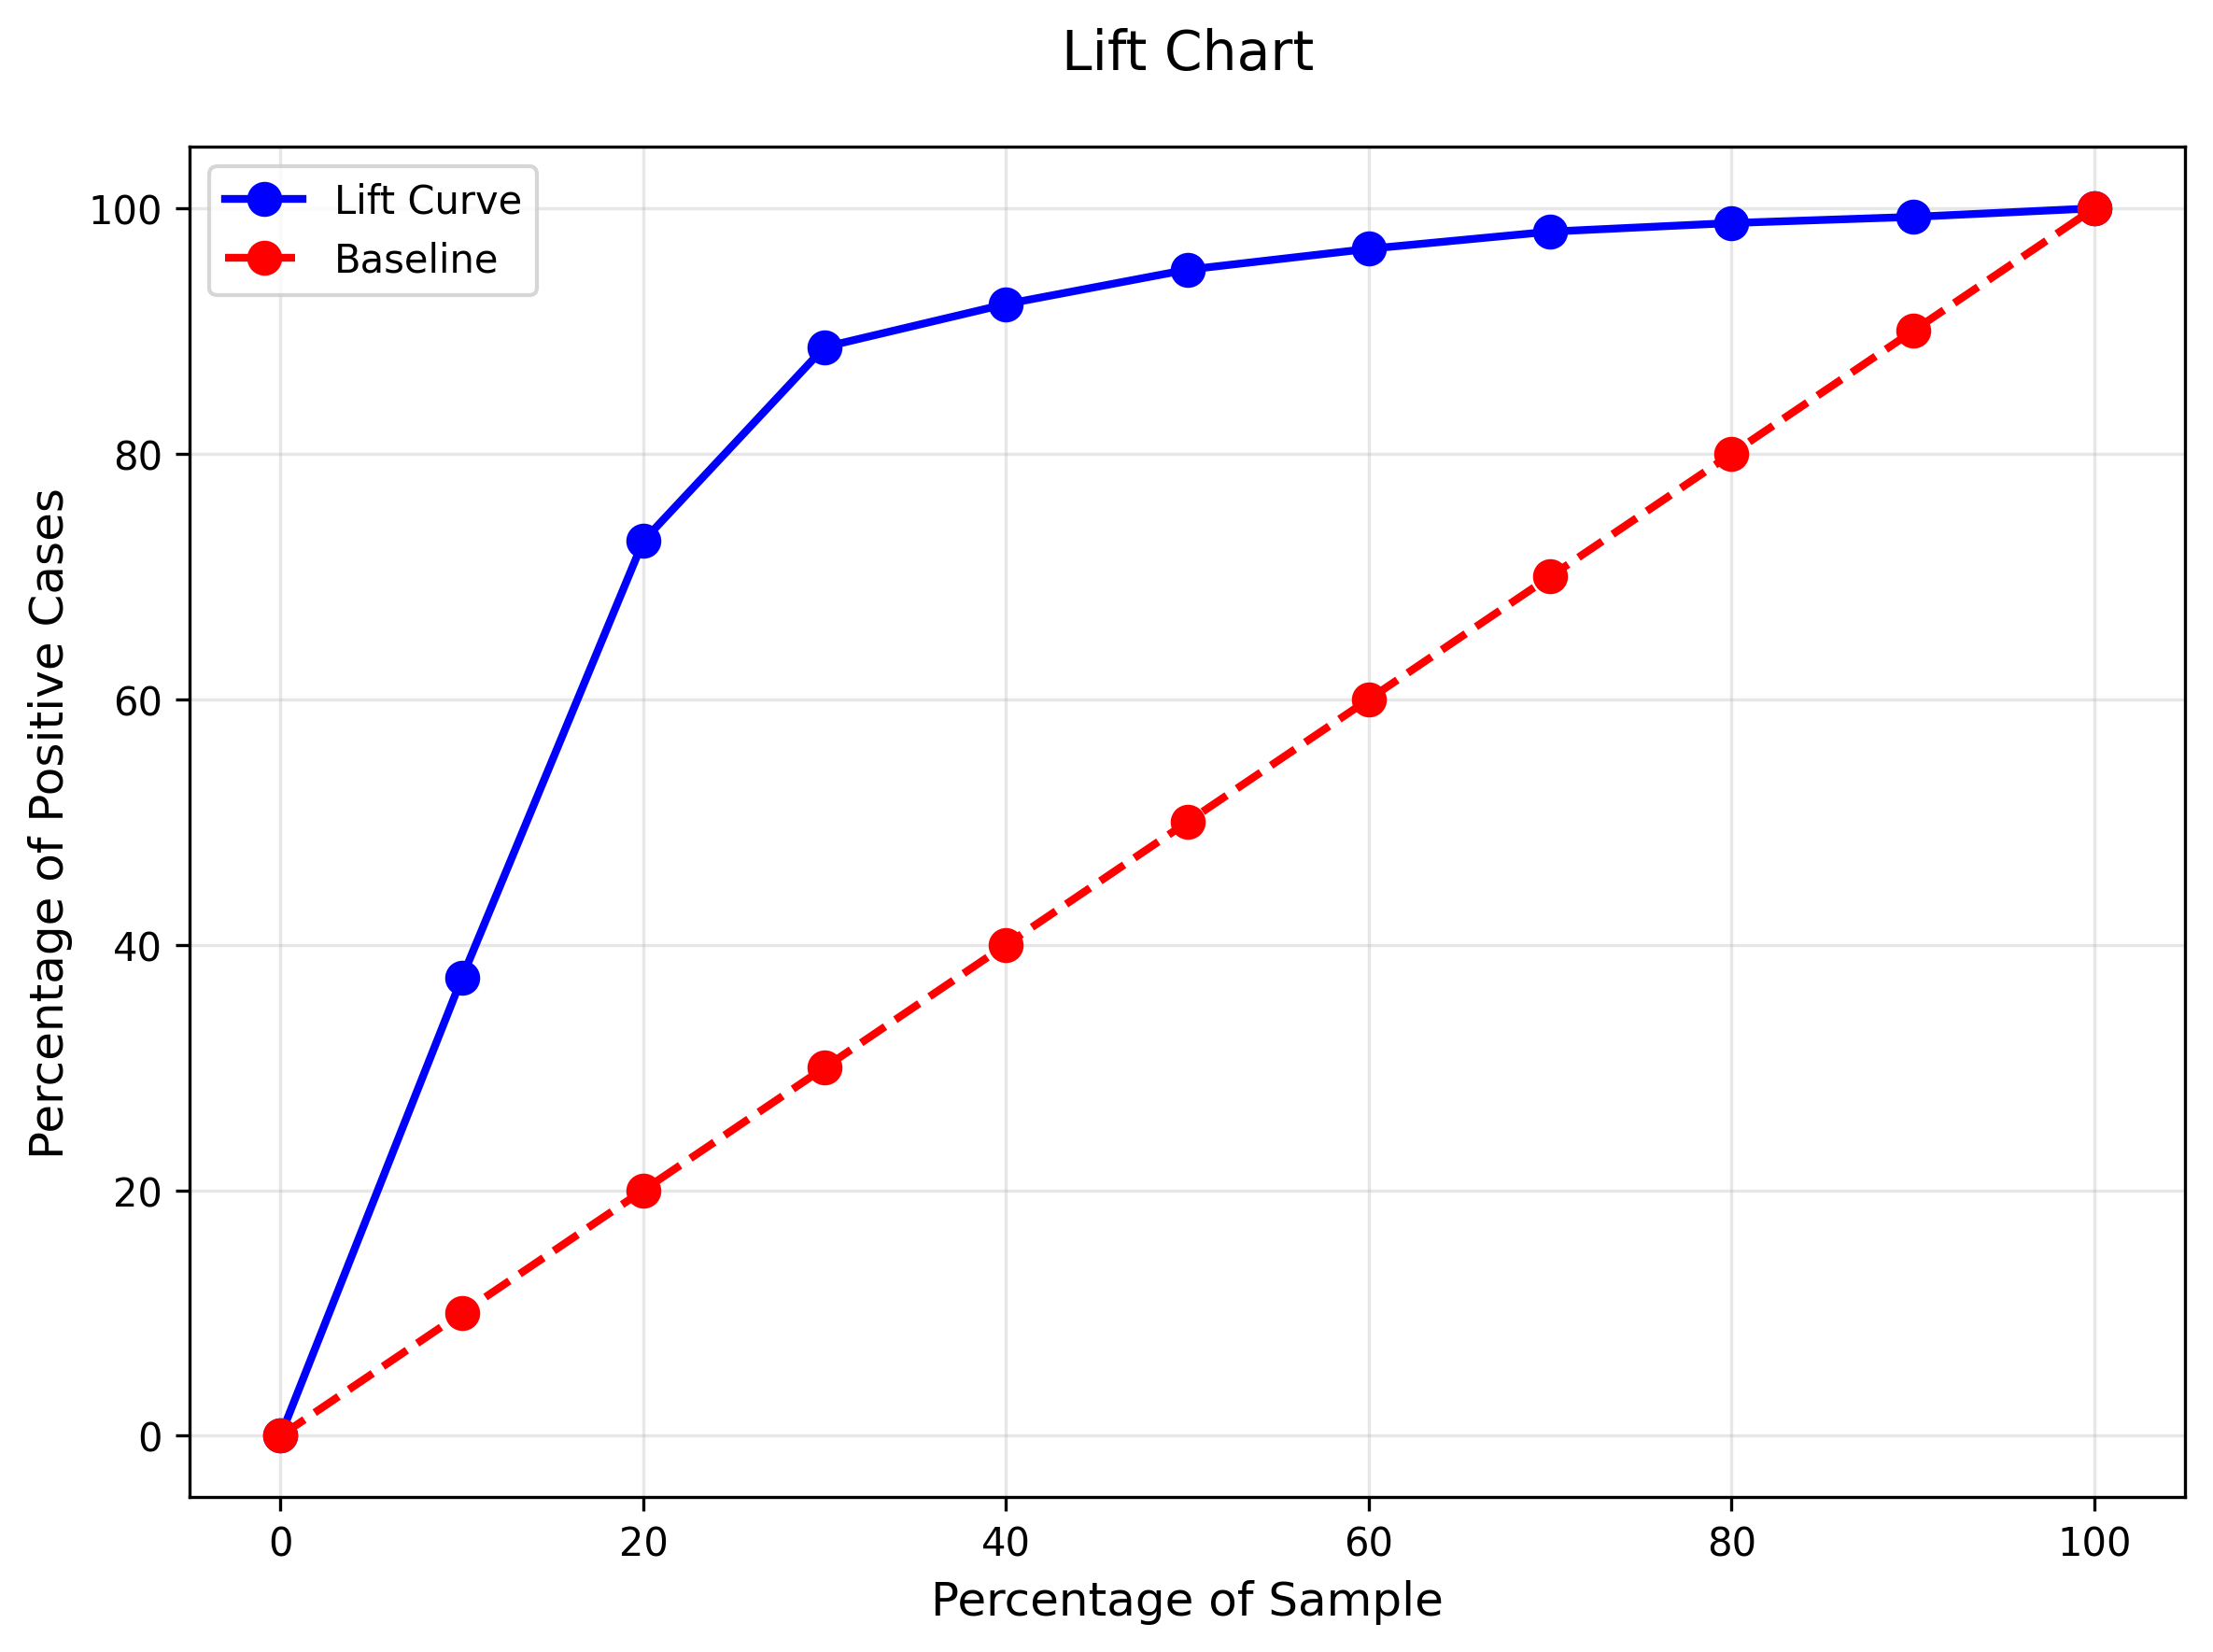

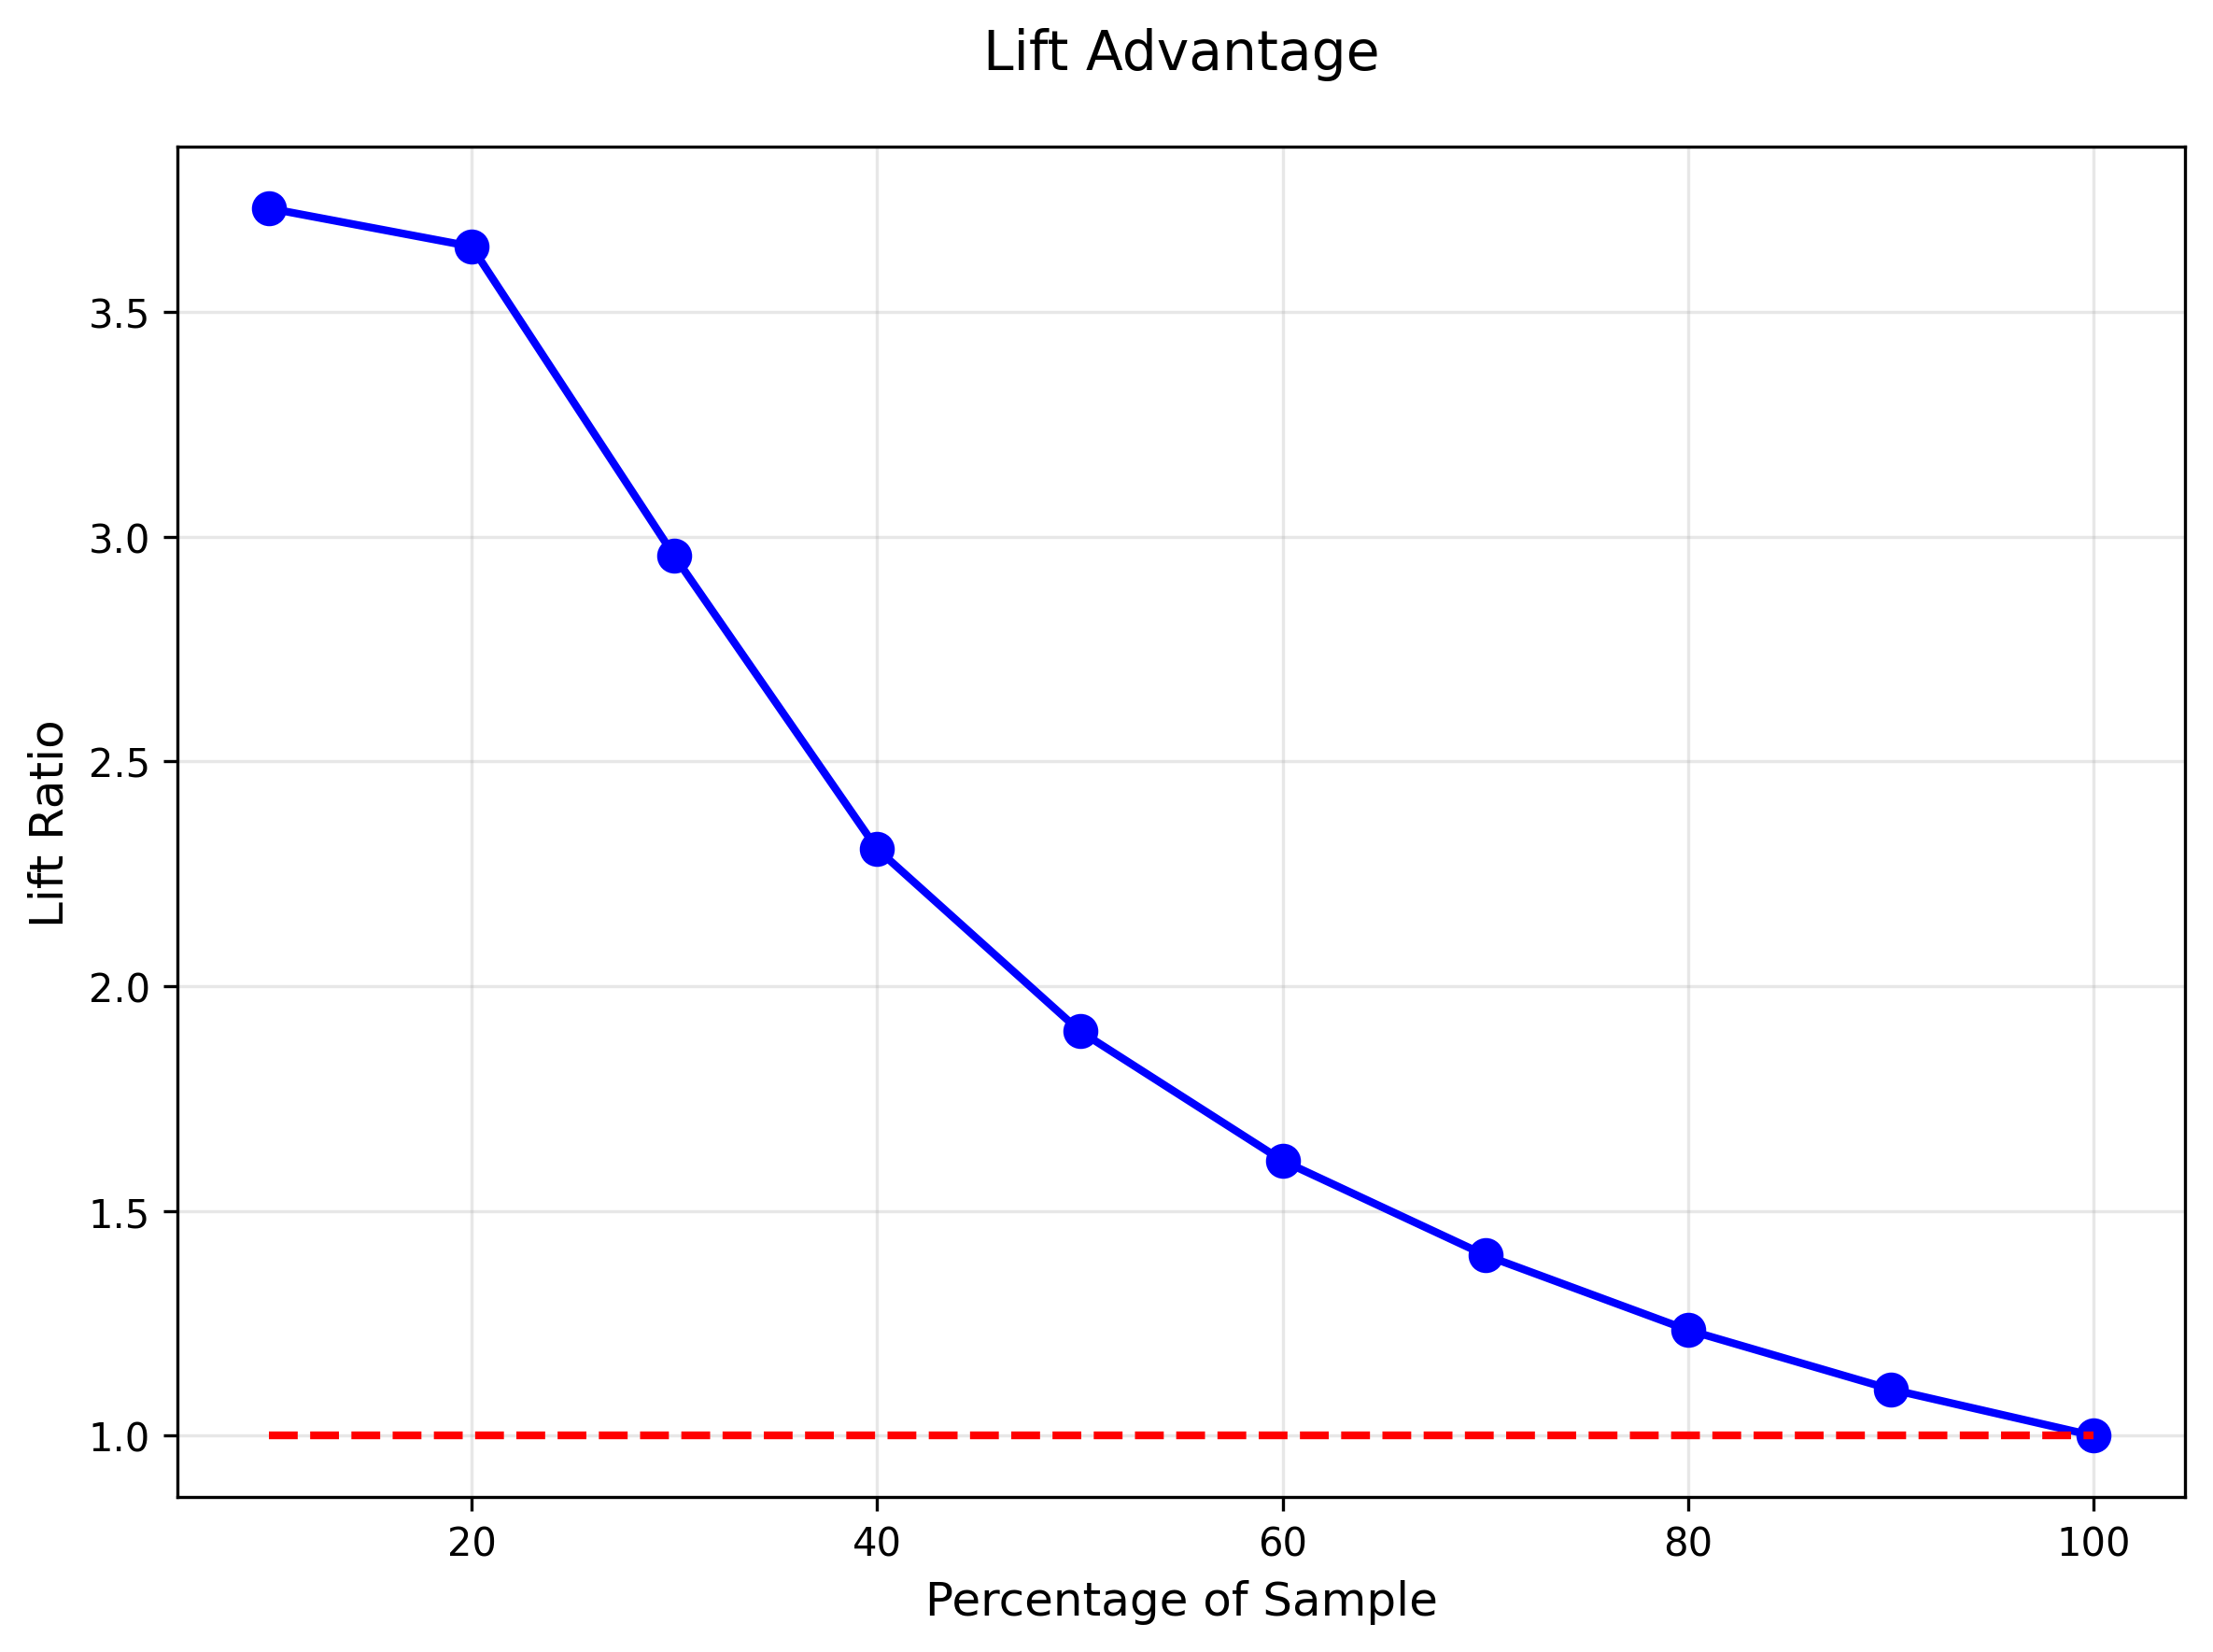

id  age  dist  income  gender  marital_status  target  predicted_probs
585    586   80    16       4       1               1       1             0.99
1804  1805   80    16       4       1               1       1             0.99
2726  2727   79     0       2       0               1       1             0.98
171    172   77     5      11       1               1       1             0.98
702    703   85     2      10       1               1       1             0.98

id  age  dist  income  gender  marital_status  target  predicted_probs
555    556   77     5      11       0               0       0            0.080
3491  3492   82     3      11       1               1       1            0.060
527    528   80     3      11       0               1       0            0.160
3925  3926   73     1       3       1               0       0            0.255
2989  2990   69     5       2       1               1       0            0.285

In [232]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

X = data[['age', 'dist', 'income', 'gender', 'marital_status']]
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

print(f"Training Accuracy: {rf_model.score(X_train, y_train):.3f}")
print(f"Testing Accuracy: {rf_model.score(X_test, y_test):.3f}")

y_pred_proba = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
optimal_threshold = thresholds[np.argmin(np.abs(tpr - (1-fpr)))]

plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC (AUC = {auc(fpr, tpr):.2f})')
ax1.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax1.set_xlabel('False Positive Rate', fontsize=12)
ax1.set_ylabel('True Positive Rate', fontsize=12)
ax1.legend(fontsize=10)
ax1.tick_params(labelsize=10)

ax2.plot(thresholds, tpr, label='Sensitivity', color='green', lw=2)
ax2.plot(thresholds, 1-fpr, label='Specificity', color='red', lw=2)
ax2.axvline(x=optimal_threshold, color='black', linestyle='--', lw=2)
ax2.legend(fontsize=10)
ax2.tick_params(labelsize=10)
plt.tight_layout()
plt.show()

print(f"Optimal threshold: {optimal_threshold:.3f}")
print(f"Sensitivity: {tpr[np.argmin(np.abs(tpr - (1-fpr)))]:.3f}")
print(f"Specificity: {1-fpr[np.argmin(np.abs(tpr - (1-fpr)))]:.3f}")

plt.figure(figsize=(4, 3))
conf_matrix = confusion_matrix(y_test, (y_pred_proba >= optimal_threshold).astype(int))
plt.imshow(conf_matrix, cmap='binary')
plt.xticks([0, 1], ['0', '1'])
plt.yticks([0, 1], ['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
for i in range(2):
    for j in range(2):
        plt.text(j, i, conf_matrix[i, j], ha='center', va='center')
plt.tight_layout()
plt.show()

data['predicted_probs'] = rf_model.predict_proba(X)[:, 1]
data_sorted = data.sort_values(by='predicted_probs', ascending=False)
total_positives = data_sorted['target'].sum()
n_rows = len(data_sorted)

lift_curve = [(data_sorted.iloc[:int((i/10)*n_rows)]['target'].sum() / total_positives * 100) for i in range(11)]
baseline_curve = [i*10 for i in range(11)]
lift_data = pd.DataFrame({'Lift Curve': lift_curve, 'Baseline': baseline_curve})
display(lift_data)

plt.figure(figsize=(8, 6))
plt.plot(range(0, 101, 10), lift_curve, label='Lift Curve', color='blue', marker='o', lw=2, markersize=8)
plt.plot(range(0, 101, 10), baseline_curve, label='Baseline', color='red', linestyle='--', marker='o', lw=2, markersize=8)
plt.xlabel('Percentage of Sample', fontsize=12)
plt.ylabel('Percentage of Positive Cases', fontsize=12)
plt.title('Lift Chart', fontsize=14, pad=20)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tick_params(labelsize=10)
plt.tight_layout()
plt.show()

advantage_data = pd.DataFrame({'Lift': np.array(lift_curve[1:])/np.array(baseline_curve[1:])})
plt.figure(figsize=(8, 6))
plt.plot(range(10, 101, 10), advantage_data['Lift'], color='blue', marker='o', lw=2, markersize=8)
plt.plot(range(10, 101, 10), [1]*10, color='red', linestyle='--', lw=2)
plt.xlabel('Percentage of Sample', fontsize=12)
plt.ylabel('Lift Ratio', fontsize=12)
plt.title('Lift Advantage', fontsize=14, pad=20)
plt.grid(True, alpha=0.3)
plt.tick_params(labelsize=10)
plt.tight_layout()
plt.show()

display(data_sorted.head())
display(data.sample(frac=1, random_state=42).head())

### good performance 

Within sampling only 30% of potential customers, Random Forest obtained 90% of totall customer responses.

### Why did Logistic Reggression perform so poorly and Random Forest Perform so well 

What can we learn about Logstics Regression from answering this and what are implications for best practises. 

## Examination of predictor variables

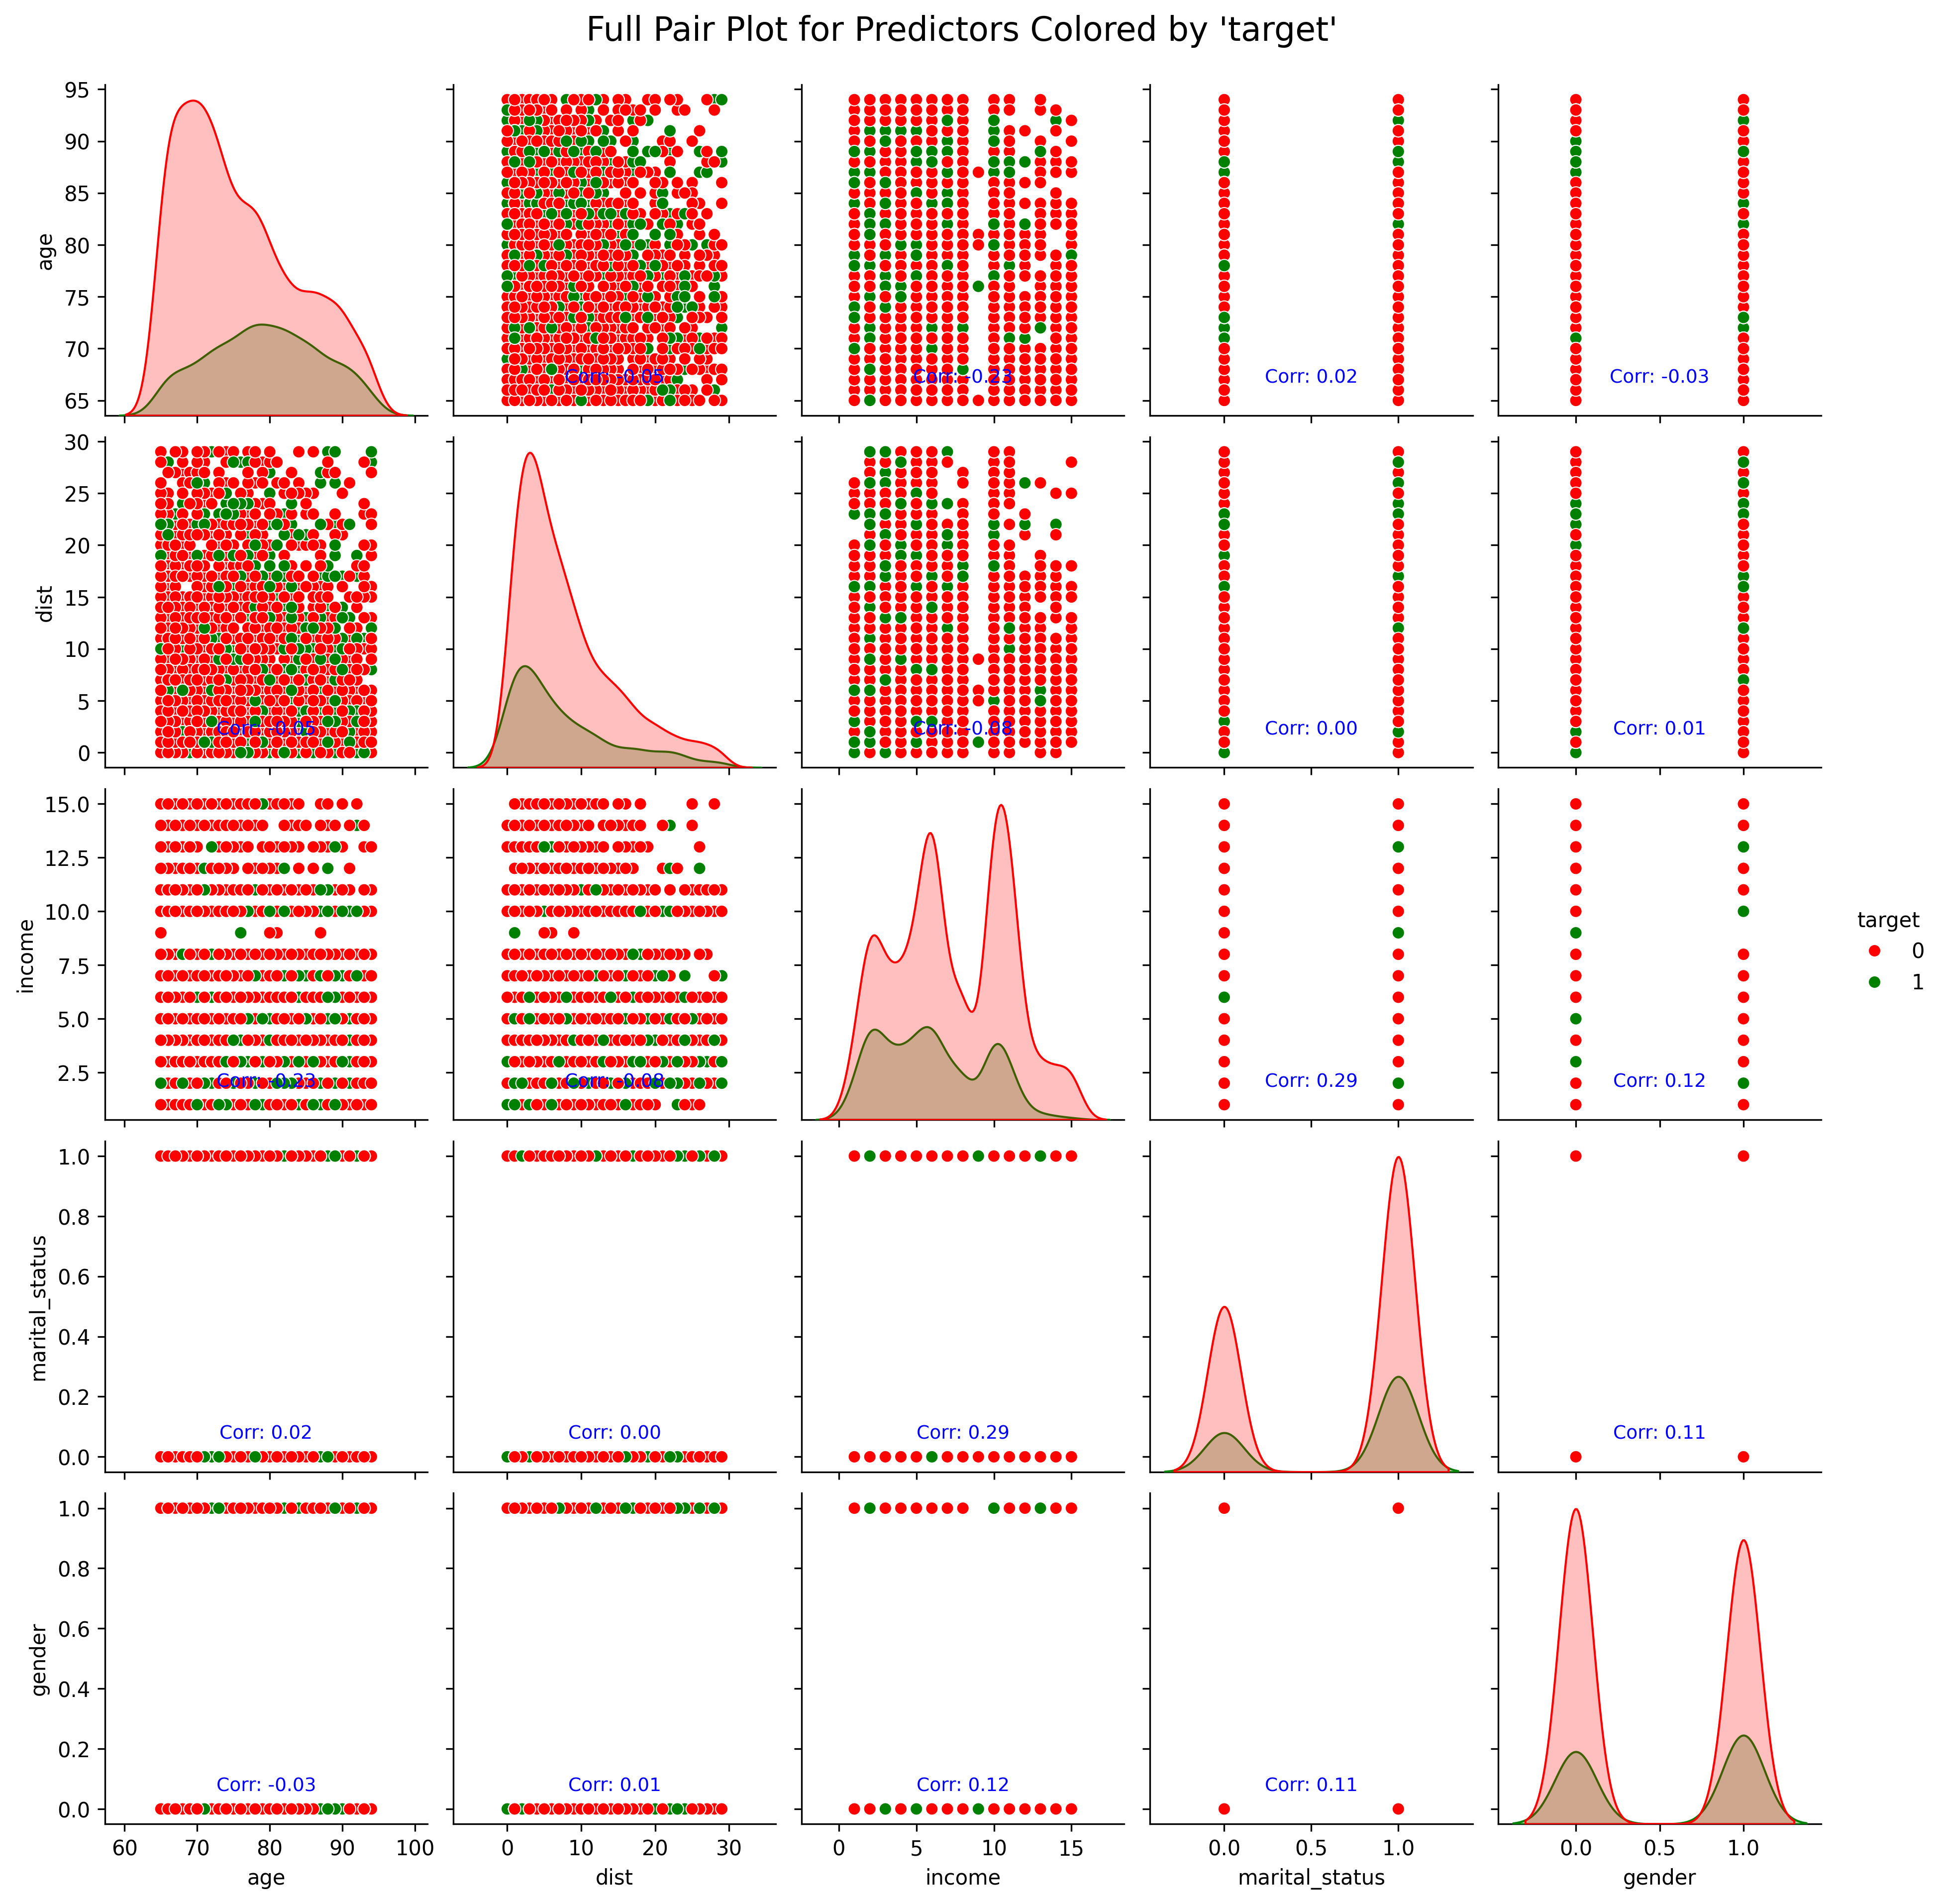

In [233]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_full_pairplot_with_corr_binary_target(df, continuous_vars, target_var='target', positive_value=1, negative_value=0):
    pairplot_data = df[continuous_vars + [target_var]].copy()
    pairplot_data[target_var] = pairplot_data[target_var].astype('category')
    correlation_matrix = pairplot_data[continuous_vars].corr()
    g = sns.pairplot(pairplot_data, hue=target_var, palette={positive_value: 'green', negative_value: 'red'}, diag_kind='kde', corner=False)
    for i, row_var in enumerate(continuous_vars):
        for j, col_var in enumerate(continuous_vars):
            if i != j:
                g.axes[i, j].annotate(f"Corr: {correlation_matrix.loc[row_var, col_var]:.2f}", xy=(0.5, 0.1), xycoords="axes fraction", ha="center", fontsize=9, color="blue")
    plt.suptitle(f"Full Pair Plot for Predictors Colored by '{target_var}'", y=1.02, fontsize=16)
    plt.show()

plot_full_pairplot_with_corr_binary_target(data, ['age', 'dist', 'income', 'marital_status', 'gender'], 'target')

1. The plots off the main diagonals are scatterplots of the predictor variables with green dots coresponding to posative outcomes of the variable pair within observations and red dots for negative outcomes. Within these scatterplots we fail to see a clear pattern in the responses coresponding to the combinations of pairs of 2 of the continuous predictors. 

2. Across the diagnonal are the density curves of the predictor variables stratified by the values which corespond to posative or negative respones within observations. In visual examination of the density curves divided by posative and negative outocomes, signifigant differences between the two outcome groups density curves are not evident for variables gender, marital status, and distance.

3. only within the density plots of age and income do we see signifigant difference in the values corespsonging to different outcomes. Thus these will be out two strongest predictors of posative outcome. 

# distributions stratified by outcome

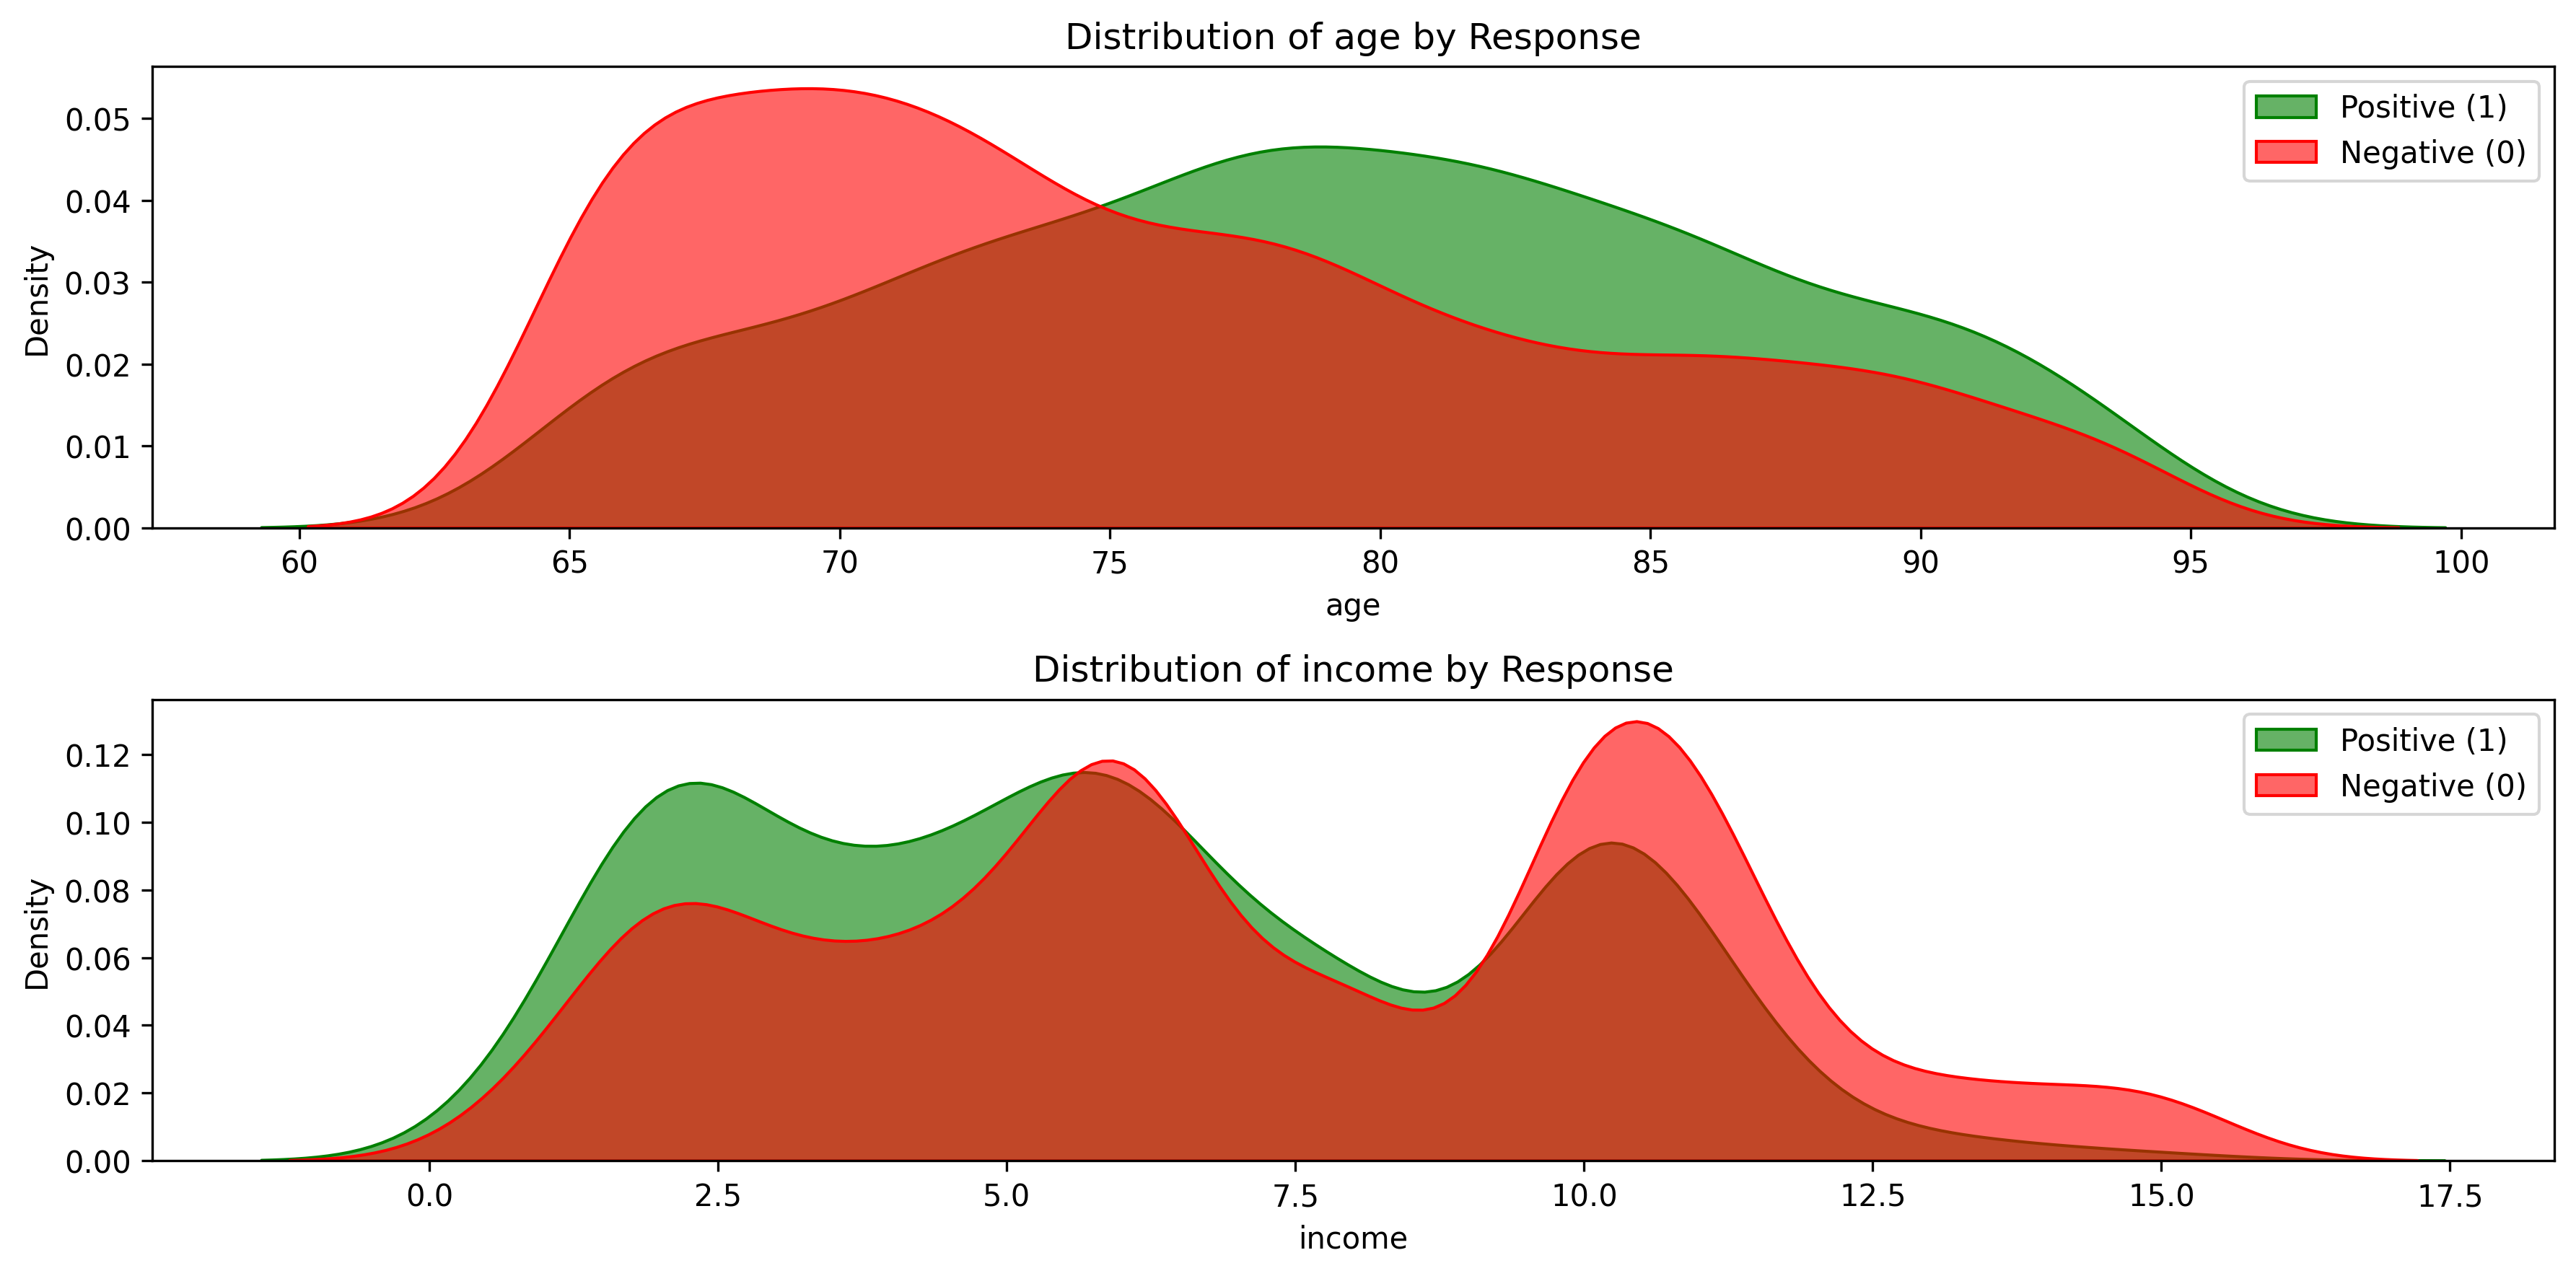

In [234]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def ridge_plot_by_response(df, variables, categorical_var='target', positive_value=1, negative_value=0):
    """
    Create ridge line plots for variables showing the distribution for positive and negative responses.
    
    Parameters:
    - df: DataFrame containing the data.
    - variables: List of continuous variables to plot.
    - categorical_var: Name of the binary target column.
    - positive_value: Value representing positive outcomes (default=1).
    - negative_value: Value representing negative outcomes (default=0).
    """
    # Create the ridge plot for each variable
    plt.figure(figsize=(12, 6))
    
    for i, var in enumerate(variables):
        plt.subplot(2, 1, i + 1)
        
        # Positive responses
        sns.kdeplot(data=df[df[categorical_var] == positive_value], x=var, 
                    fill=True, alpha=0.6, label=f'Positive ({positive_value})', color='green')
        
        # Negative responses
        sns.kdeplot(data=df[df[categorical_var] == negative_value], x=var, 
                    fill=True, alpha=0.6, label=f'Negative ({negative_value})', color='red')
        
        # Add plot details
        plt.title(f'Distribution of {var} by Response')
        plt.xlabel(var)
        plt.ylabel('Density')
        plt.legend()
    
    plt.tight_layout()
    plt.show()

# Example usage:
variables = ['age', 'income']
ridge_plot_by_response(data, variables, categorical_var='target', positive_value=1, negative_value=0)

The density curve is dependent upon sample size as well as proportion. To isolate the relationship between these variables and posative or negative outcomes, we plot the proportion of outcomes which were posative coresponding to each value of the predictor variables across the entire span of the data set. 

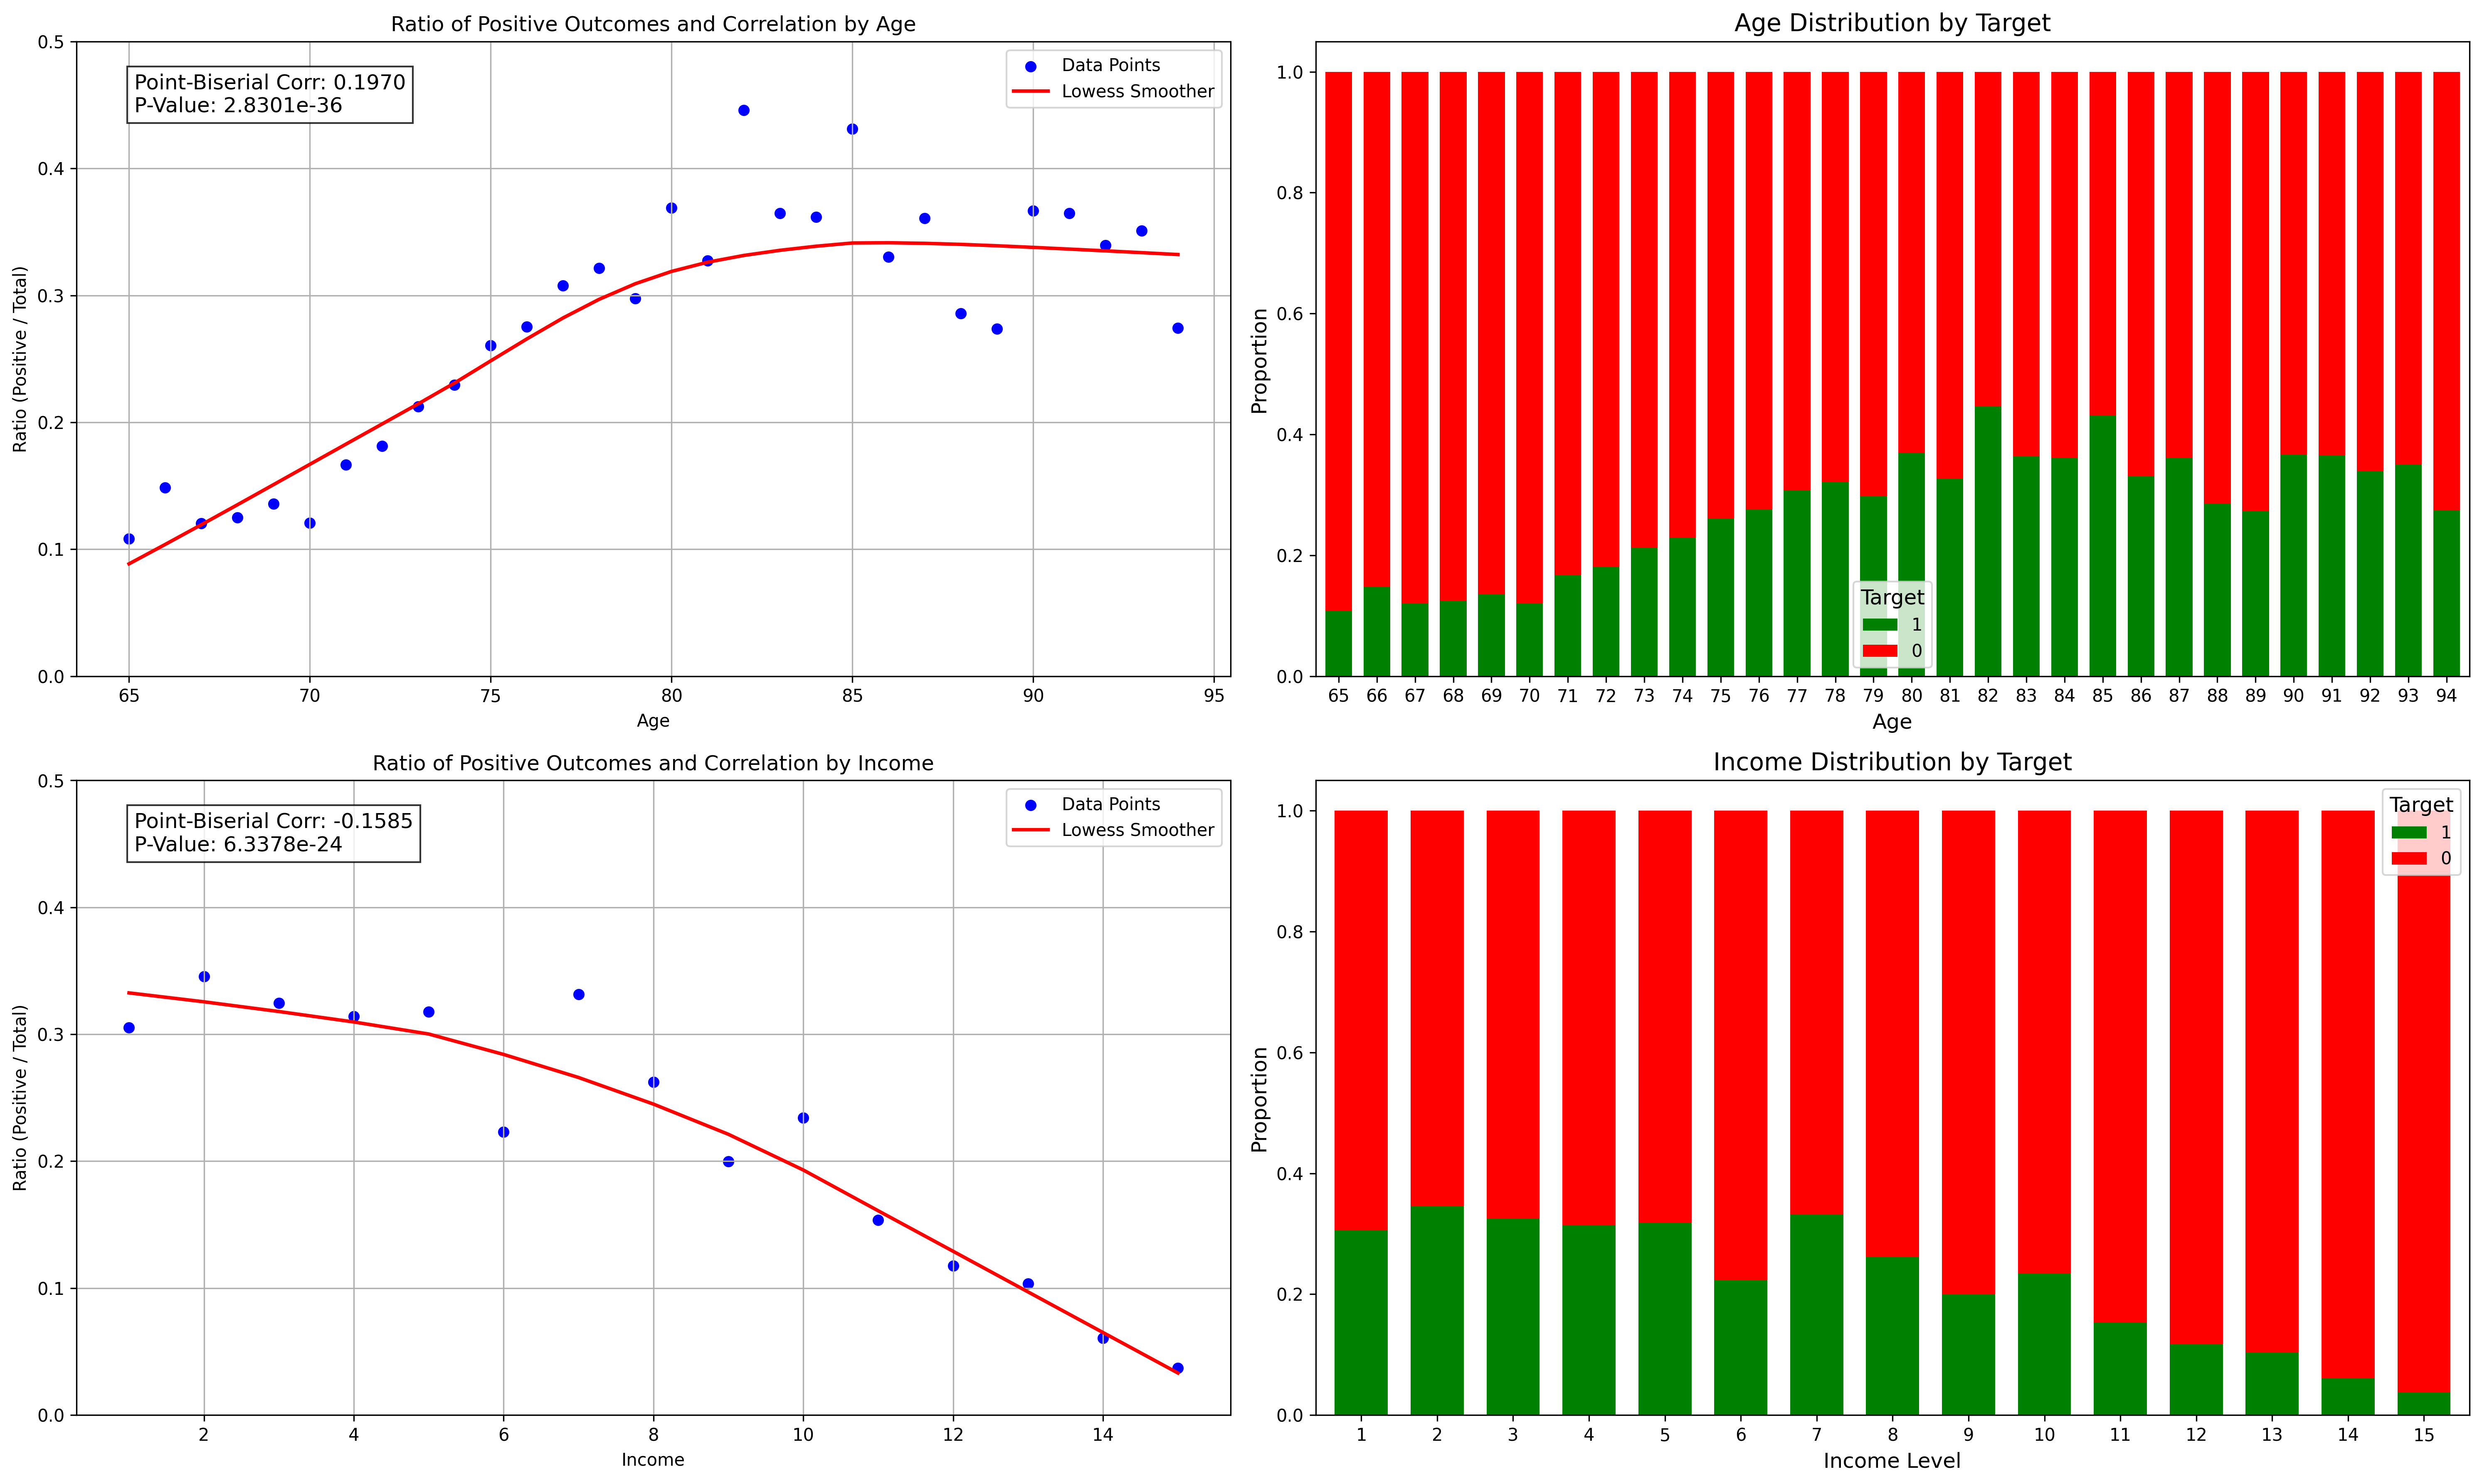

In [235]:
def plot_ratio_positive_negative_with_corr(df, continuous_var, categorical_var='target', positive_value=1, negative_value=0):
    grouped = df.groupby([continuous_var, categorical_var]).size().reset_index(name='count')
    pivot = grouped.pivot(index=continuous_var, columns=categorical_var, values='count').fillna(0)
    
    positive_counts = pivot[positive_value] if positive_value in pivot.columns else 0
    total_counts = positive_counts + pivot[negative_value] if negative_value in pivot.columns else positive_counts
    ratio = positive_counts / (total_counts + 1e-9)
    
    plot_df = pd.DataFrame({continuous_var: ratio.index, 'ratio_positive_negative': ratio.values})
    return plot_df, *pointbiserialr(df[continuous_var], df[categorical_var])

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 12))

age_plot_df, age_corr, age_p = plot_ratio_positive_negative_with_corr(data, 'age', 'target')
sns.scatterplot(x='age', y='ratio_positive_negative', data=age_plot_df, color='blue', s=50, label='Data Points', ax=ax1)
sns.regplot(x='age', y='ratio_positive_negative', data=age_plot_df, scatter=False, lowess=True, color='red', line_kws={'lw': 2}, label='Lowess Smoother', ax=ax1)
ax1.text(0.05, 0.95, f'Point-Biserial Corr: {age_corr:.4f}\nP-Value: {age_p:.4e}', transform=ax1.transAxes, fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8))
ax1.set_title('Ratio of Positive Outcomes and Correlation by Age')
ax1.set_xlabel('Age')
ax1.set_ylabel('Ratio (Positive / Total)')
ax1.set_ylim(0, 0.50)
ax1.legend()
ax1.grid()

age_proportions = data.groupby(["age", "target"]).size().unstack(fill_value=0).apply(lambda x: x / x.sum(), axis=1)
age_proportions[[1, 0]].plot(kind="bar", stacked=True, ax=ax2, width=0.7, legend=True, color=['green', 'red'])
ax2.set_title("Age Distribution by Target", fontsize=14)
ax2.set_ylabel("Proportion", fontsize=12)
ax2.set_xlabel("Age", fontsize=12)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0, ha='center')
ax2.legend(title="Target", title_fontsize=12, fontsize=10)

income_plot_df, income_corr, income_p = plot_ratio_positive_negative_with_corr(data, 'income', 'target')
sns.scatterplot(x='income', y='ratio_positive_negative', data=income_plot_df, color='blue', s=50, label='Data Points', ax=ax3)
sns.regplot(x='income', y='ratio_positive_negative', data=income_plot_df, scatter=False, lowess=True, color='red', line_kws={'lw': 2}, label='Lowess Smoother', ax=ax3)
ax3.text(0.05, 0.95, f'Point-Biserial Corr: {income_corr:.4f}\nP-Value: {income_p:.4e}', transform=ax3.transAxes, fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8))
ax3.set_title('Ratio of Positive Outcomes and Correlation by Income')
ax3.set_xlabel('Income')
ax3.set_ylabel('Ratio (Positive / Total)')
ax3.set_ylim(0, 0.50)
ax3.legend()
ax3.grid()

income_proportions = data.groupby(["income", "target"]).size().unstack(fill_value=0).apply(lambda x: x / x.sum(), axis=1)
income_proportions[[1, 0]].plot(kind="bar", stacked=True, ax=ax4, width=0.7, legend=True, color=['green', 'red'])
ax4.set_title("Income Distribution by Target", fontsize=14)
ax4.set_ylabel("Proportion", fontsize=12)
ax4.set_xlabel("Income Level", fontsize=12)
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=0, ha='center')
ax4.legend(title="Target", title_fontsize=12, fontsize=10)

plt.tight_layout()
plt.show()

Notice that the relationship between age and posative outcomes is not linear, there is a peak around 80 and subsueqently declines. 

It seems that proportion of posative outcomes declines steadily as income level increases.

# How Logistic Regresion models these relationships

Optimization terminated successfully.
         Current function value: 0.527865
         Iterations 6


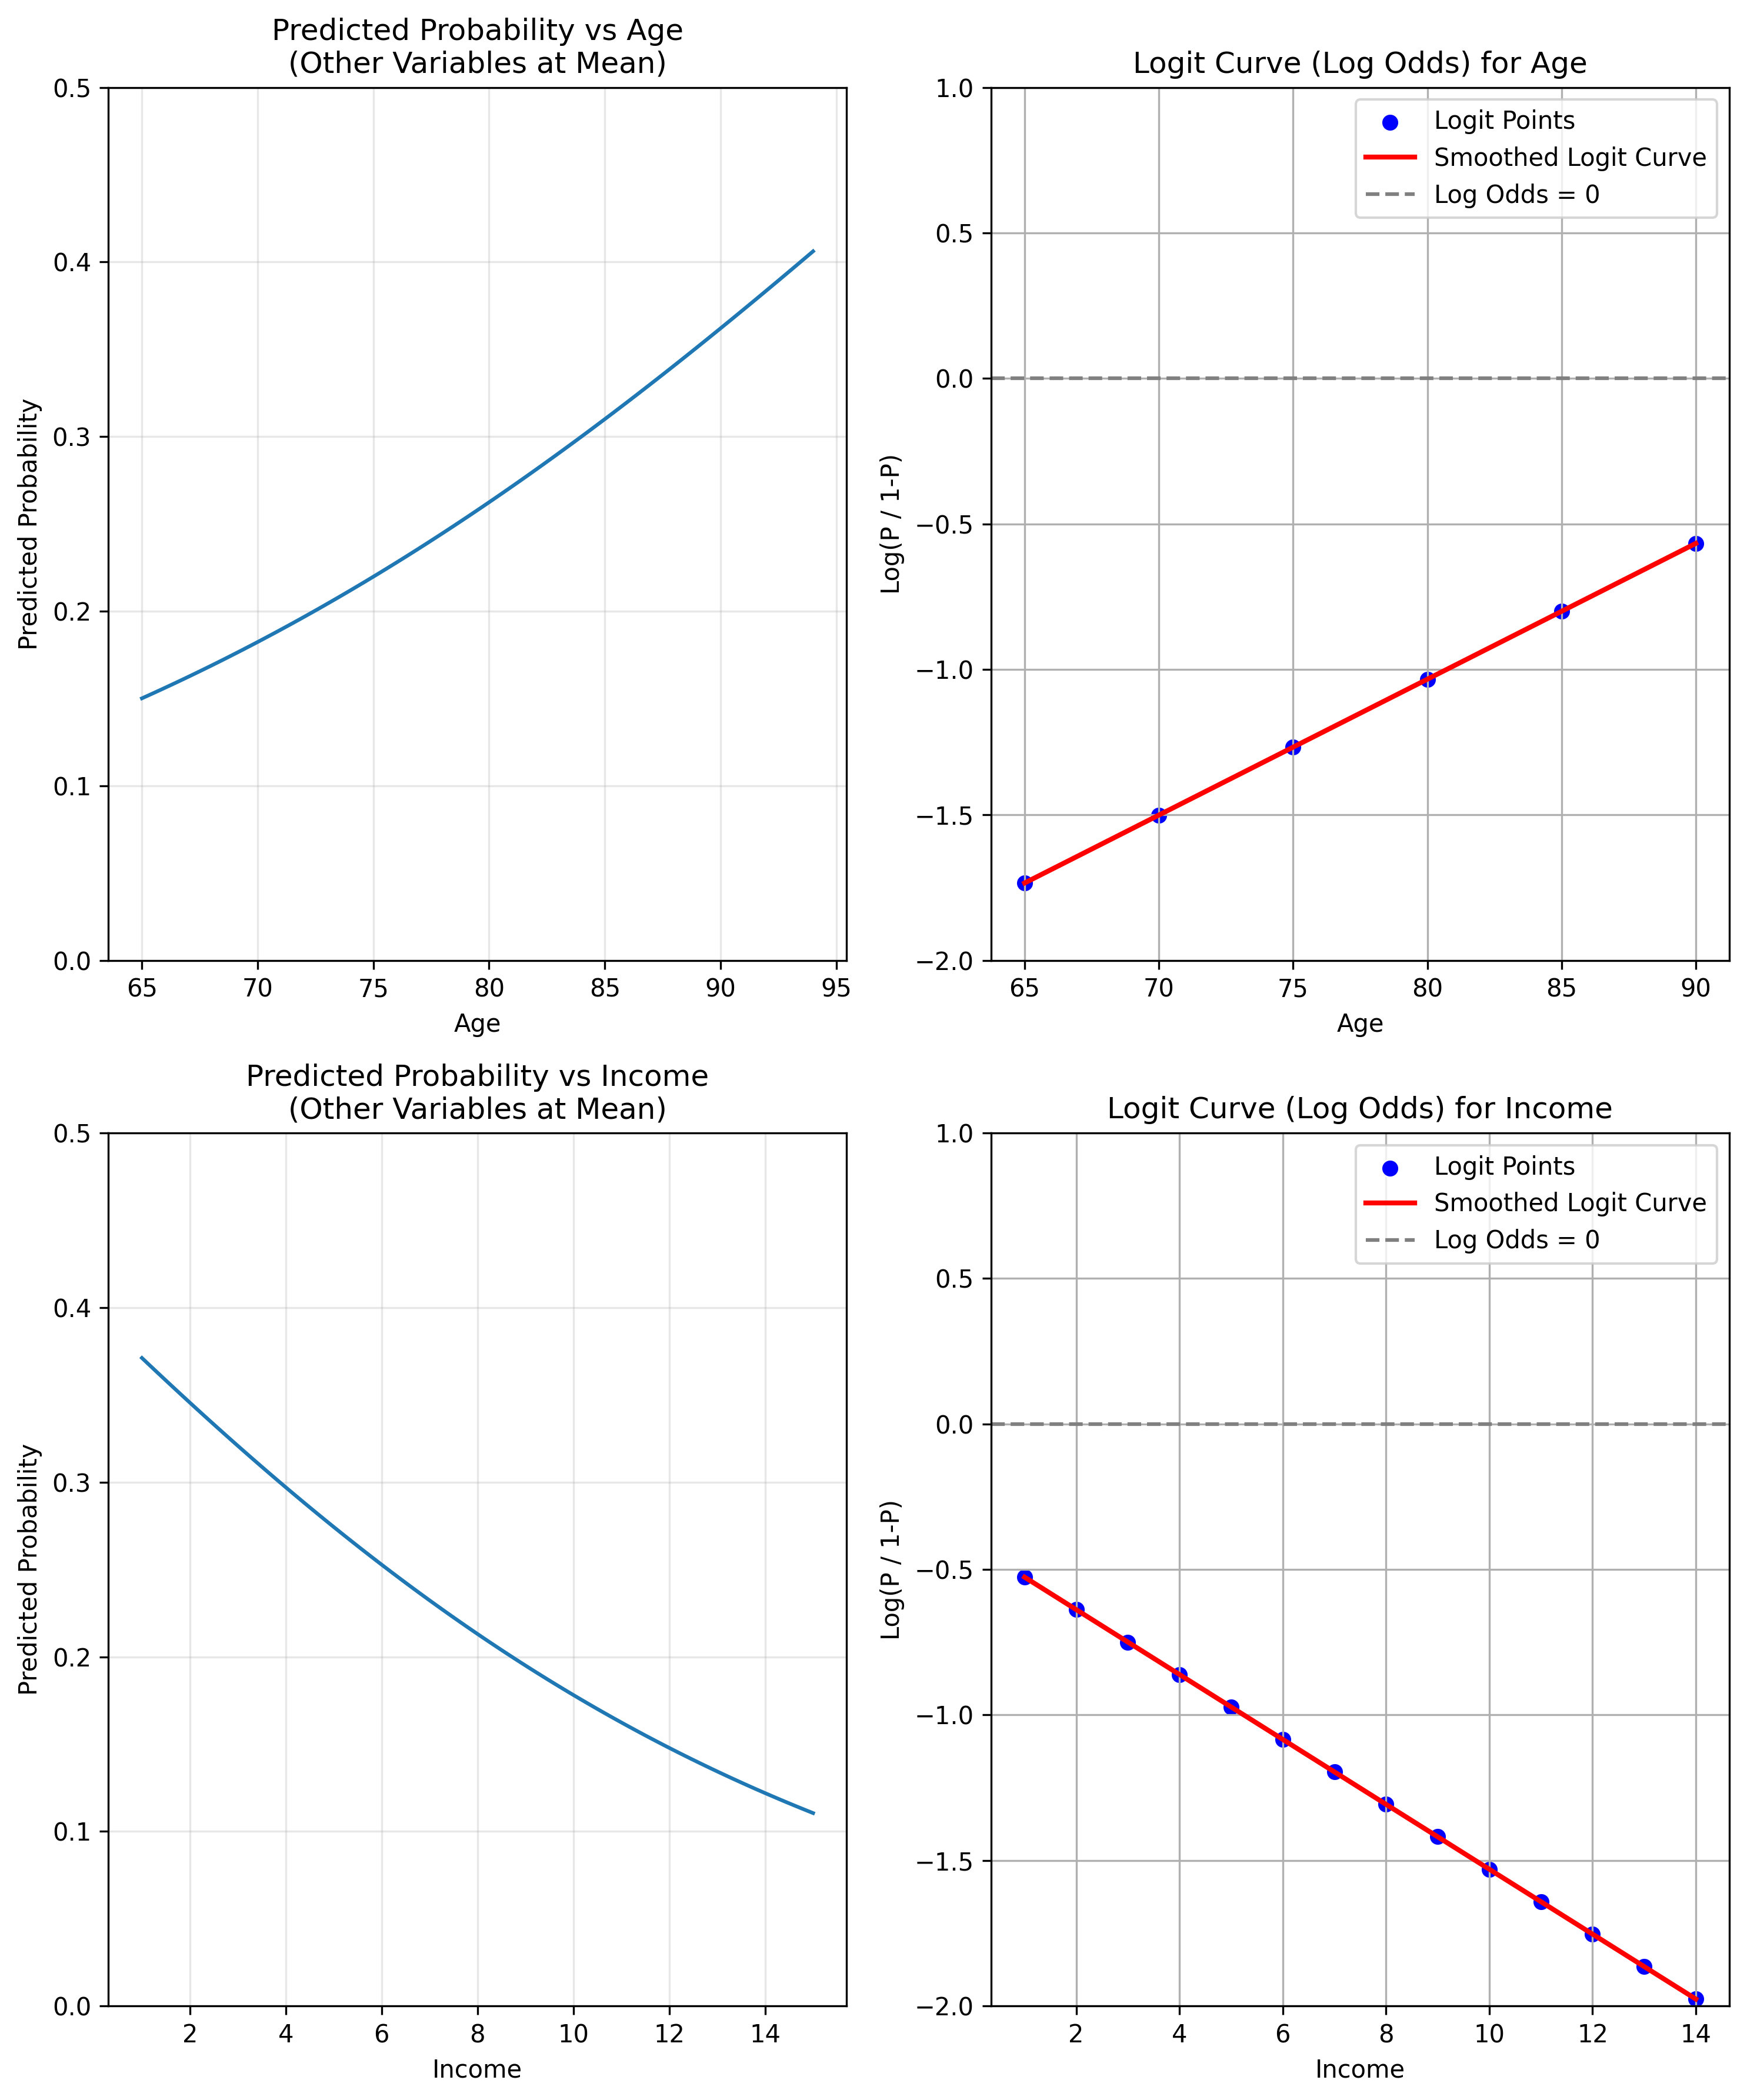

In [236]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm

X = data[['age', 'dist', 'income', 'gender', 'marital_status']]
y = data['target']

lr_model = LogisticRegression(random_state=42)
lr_model.fit(X, y)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 12))

mean_values = X.mean()

x_range_age = np.linspace(X['age'].min(), X['age'].max(), 100)

pred_data_age = np.tile(mean_values, (100, 1))
pred_data_age = pd.DataFrame(pred_data_age, columns=X.columns)
pred_data_age['age'] = x_range_age

y_pred_age = lr_model.predict_proba(pred_data_age)[:, 1]

ax1.plot(x_range_age, y_pred_age)
ax1.set_title('Predicted Probability vs Age\n(Other Variables at Mean)')
ax1.set_ylabel('Predicted Probability')
ax1.set_xlabel('Age')
ax1.grid(True, alpha=0.3)
ax1.set_ylim(0, 0.5)

X_with_const = sm.add_constant(X)
logit_model = sm.Logit(y, X_with_const)
result = logit_model.fit()

feature_values_age = np.arange(X['age'].min(), X['age'].max(), 5)
fixed_predictors = mean_values.copy()
log_odds_age = []

for value in feature_values_age:
    temp_predictors = fixed_predictors.copy()
    temp_predictors['age'] = value
    predictors_with_const = sm.add_constant(temp_predictors.values.reshape(1, -1), has_constant='add')
    logit = np.dot(predictors_with_const, result.params)
    log_odds_age.append(logit[0])

plot_df_age = pd.DataFrame({
    'age': feature_values_age,
    'log_odds': log_odds_age
})

sns.scatterplot(x='age', y='log_odds', data=plot_df_age, color='blue', s=50, ax=ax2, label='Logit Points')
sns.regplot(x='age', y='log_odds', data=plot_df_age, scatter=False, lowess=True, 
            color='red', line_kws={'lw': 2}, ax=ax2, label='Smoothed Logit Curve')

ax2.set_title('Logit Curve (Log Odds) for Age')
ax2.set_xlabel('Age')
ax2.set_ylabel('Log(P / 1-P)')
ax2.set_ylim(-2, 1)
ax2.axhline(0, color='grey', linestyle='--', label='Log Odds = 0')
ax2.legend()
ax2.grid(True)

x_range_income = np.linspace(X['income'].min(), X['income'].max(), 100)

pred_data_income = np.tile(mean_values, (100, 1))
pred_data_income = pd.DataFrame(pred_data_income, columns=X.columns)
pred_data_income['income'] = x_range_income

y_pred_income = lr_model.predict_proba(pred_data_income)[:, 1]

ax3.plot(x_range_income, y_pred_income)
ax3.set_title('Predicted Probability vs Income\n(Other Variables at Mean)')
ax3.set_ylabel('Predicted Probability')
ax3.set_xlabel('Income')
ax3.grid(True, alpha=0.3)
ax3.set_ylim(0, 0.5)

feature_values_income = np.arange(X['income'].min(), X['income'].max(), 1)
fixed_predictors = mean_values.copy()
log_odds_income = []

for value in feature_values_income:
    temp_predictors = fixed_predictors.copy()
    temp_predictors['income'] = value
    predictors_with_const = sm.add_constant(temp_predictors.values.reshape(1, -1), has_constant='add')
    logit = np.dot(predictors_with_const, result.params)
    log_odds_income.append(logit[0])

plot_df_income = pd.DataFrame({
    'income': feature_values_income,
    'log_odds': log_odds_income
})

sns.scatterplot(x='income', y='log_odds', data=plot_df_income, color='blue', s=50, ax=ax4, label='Logit Points')
sns.regplot(x='income', y='log_odds', data=plot_df_income, scatter=False, lowess=True, 
            color='red', line_kws={'lw': 2}, ax=ax4, label='Smoothed Logit Curve')

ax4.set_title('Logit Curve (Log Odds) for Income')
ax4.set_xlabel('Income')
ax4.set_ylabel('Log(P / 1-P)')
ax4.set_ylim(-2, 1)
ax4.axhline(0, color='grey', linestyle='--', label='Log Odds = 0')
ax4.legend()
ax4.grid(True)

plt.tight_layout()
plt.show()

Just as as Linear Regression models response as a linear function of predictor, Logistic Regression models the log(ods) as a linear function of predictor.

It models the "coorelation" of the variable within it's observation across the entire span of the data set.

The Linear Regression model produces a function which models the individual effect of the variable on outcome, but the model is produced with respect to variation of the variable to outcome without isolation from the rest of the variables in it's observation pair.

It does this so, across the entire data set, and represents this relationship as a linear function.

It is not that there is not a predictor response relationship within the data, it is that such relationship is not present in a maner in which Logistic Regression is suited to detect. 



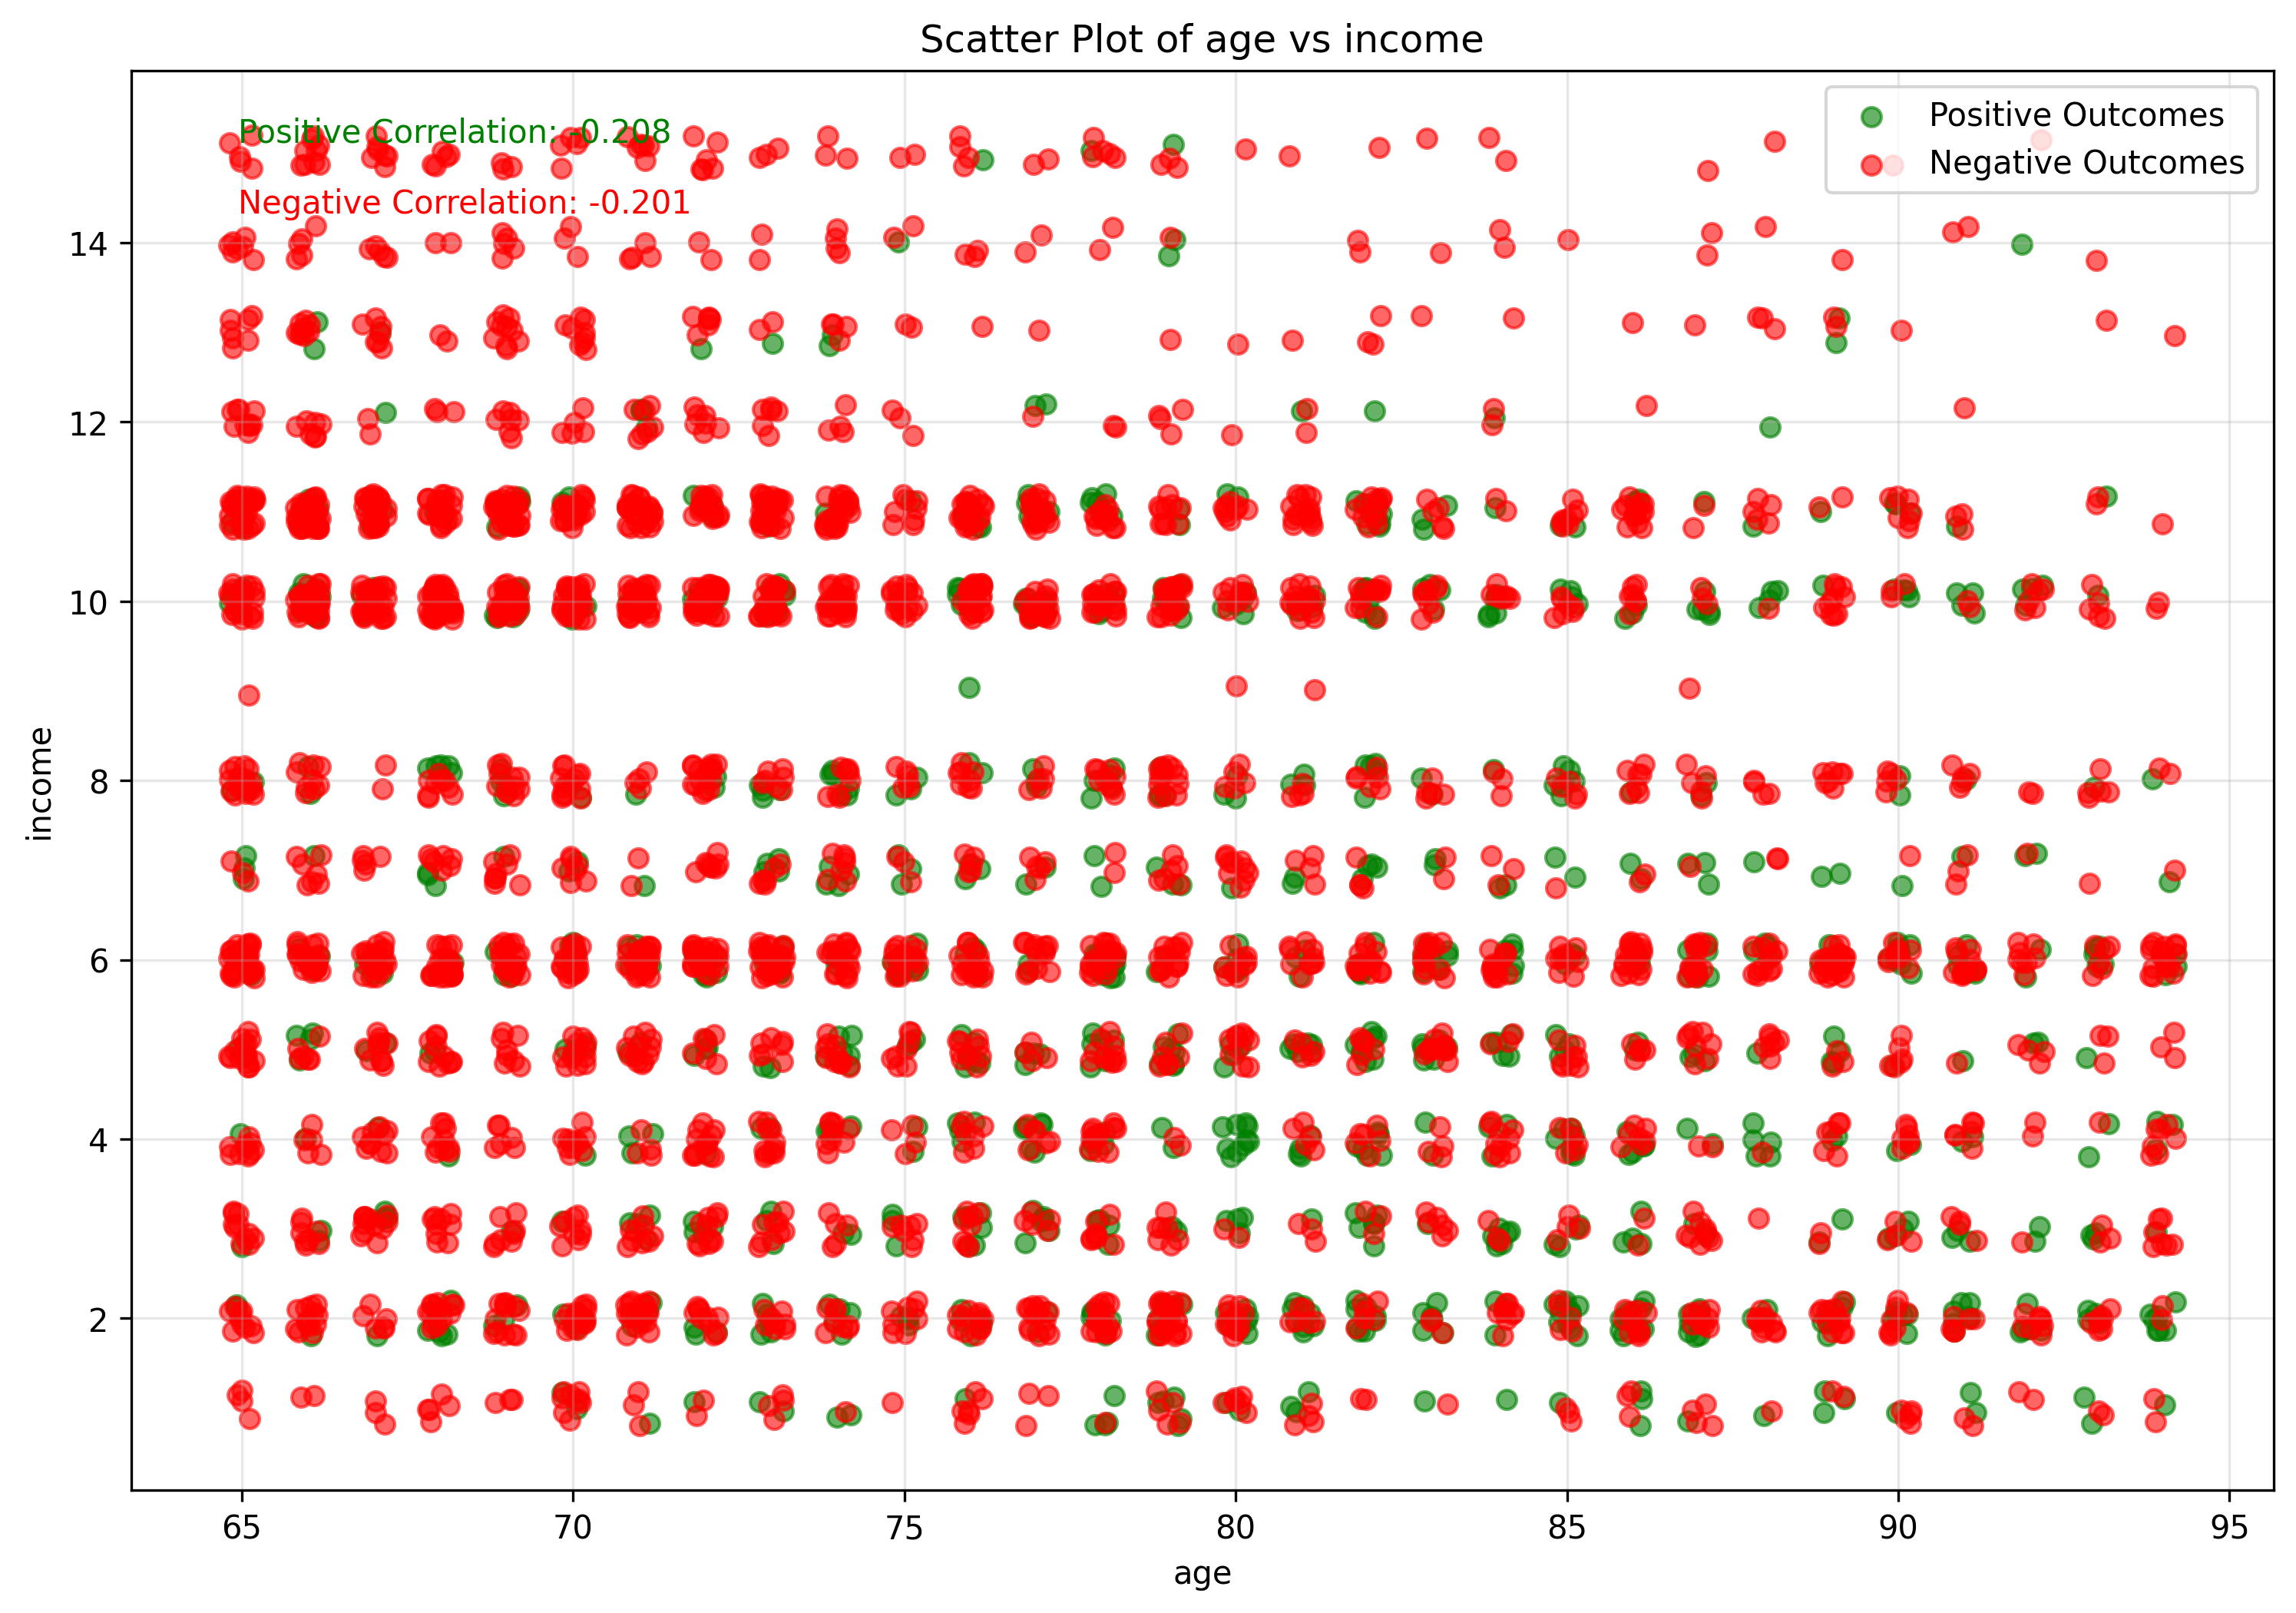

In [237]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot_scatter_with_separate_correlations(df, continuous_vars, target_var='target', positive_value=1, negative_value=0):
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    
    positive_data = df[df[target_var] == positive_value]
    negative_data = df[df[target_var] == negative_value]
    
    pos_corr = positive_data[continuous_vars[0]].corr(positive_data[continuous_vars[1]])
    neg_corr = negative_data[continuous_vars[0]].corr(negative_data[continuous_vars[1]])
    
    offset = 0.2
    pos_x = positive_data[continuous_vars[0]] + np.random.uniform(-offset, offset, len(positive_data))
    pos_y = positive_data[continuous_vars[1]] + np.random.uniform(-offset, offset, len(positive_data))
    neg_x = negative_data[continuous_vars[0]] + np.random.uniform(-offset, offset, len(negative_data))
    neg_y = negative_data[continuous_vars[1]] + np.random.uniform(-offset, offset, len(negative_data))
    
    plt.scatter(pos_x, pos_y, color='green', label='Positive Outcomes', alpha=0.6)
    plt.scatter(neg_x, neg_y, color='red', label='Negative Outcomes', alpha=0.6)
    
    plt.text(0.05, 0.95, f'Positive Correlation: {pos_corr:.3f}',
             transform=ax.transAxes, color='green', fontsize=10)
    plt.text(0.05, 0.90, f'Negative Correlation: {neg_corr:.3f}',
             transform=ax.transAxes, color='red', fontsize=10)
    
    plt.title(f'Scatter Plot of {continuous_vars[0]} vs {continuous_vars[1]}')
    plt.xlabel(continuous_vars[0])
    plt.ylabel(continuous_vars[1])
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

continuous_vars = ['age', 'income']
target_var = 'target'

plot_scatter_with_separate_correlations(data, continuous_vars, target_var, positive_value=1, negative_value=0)

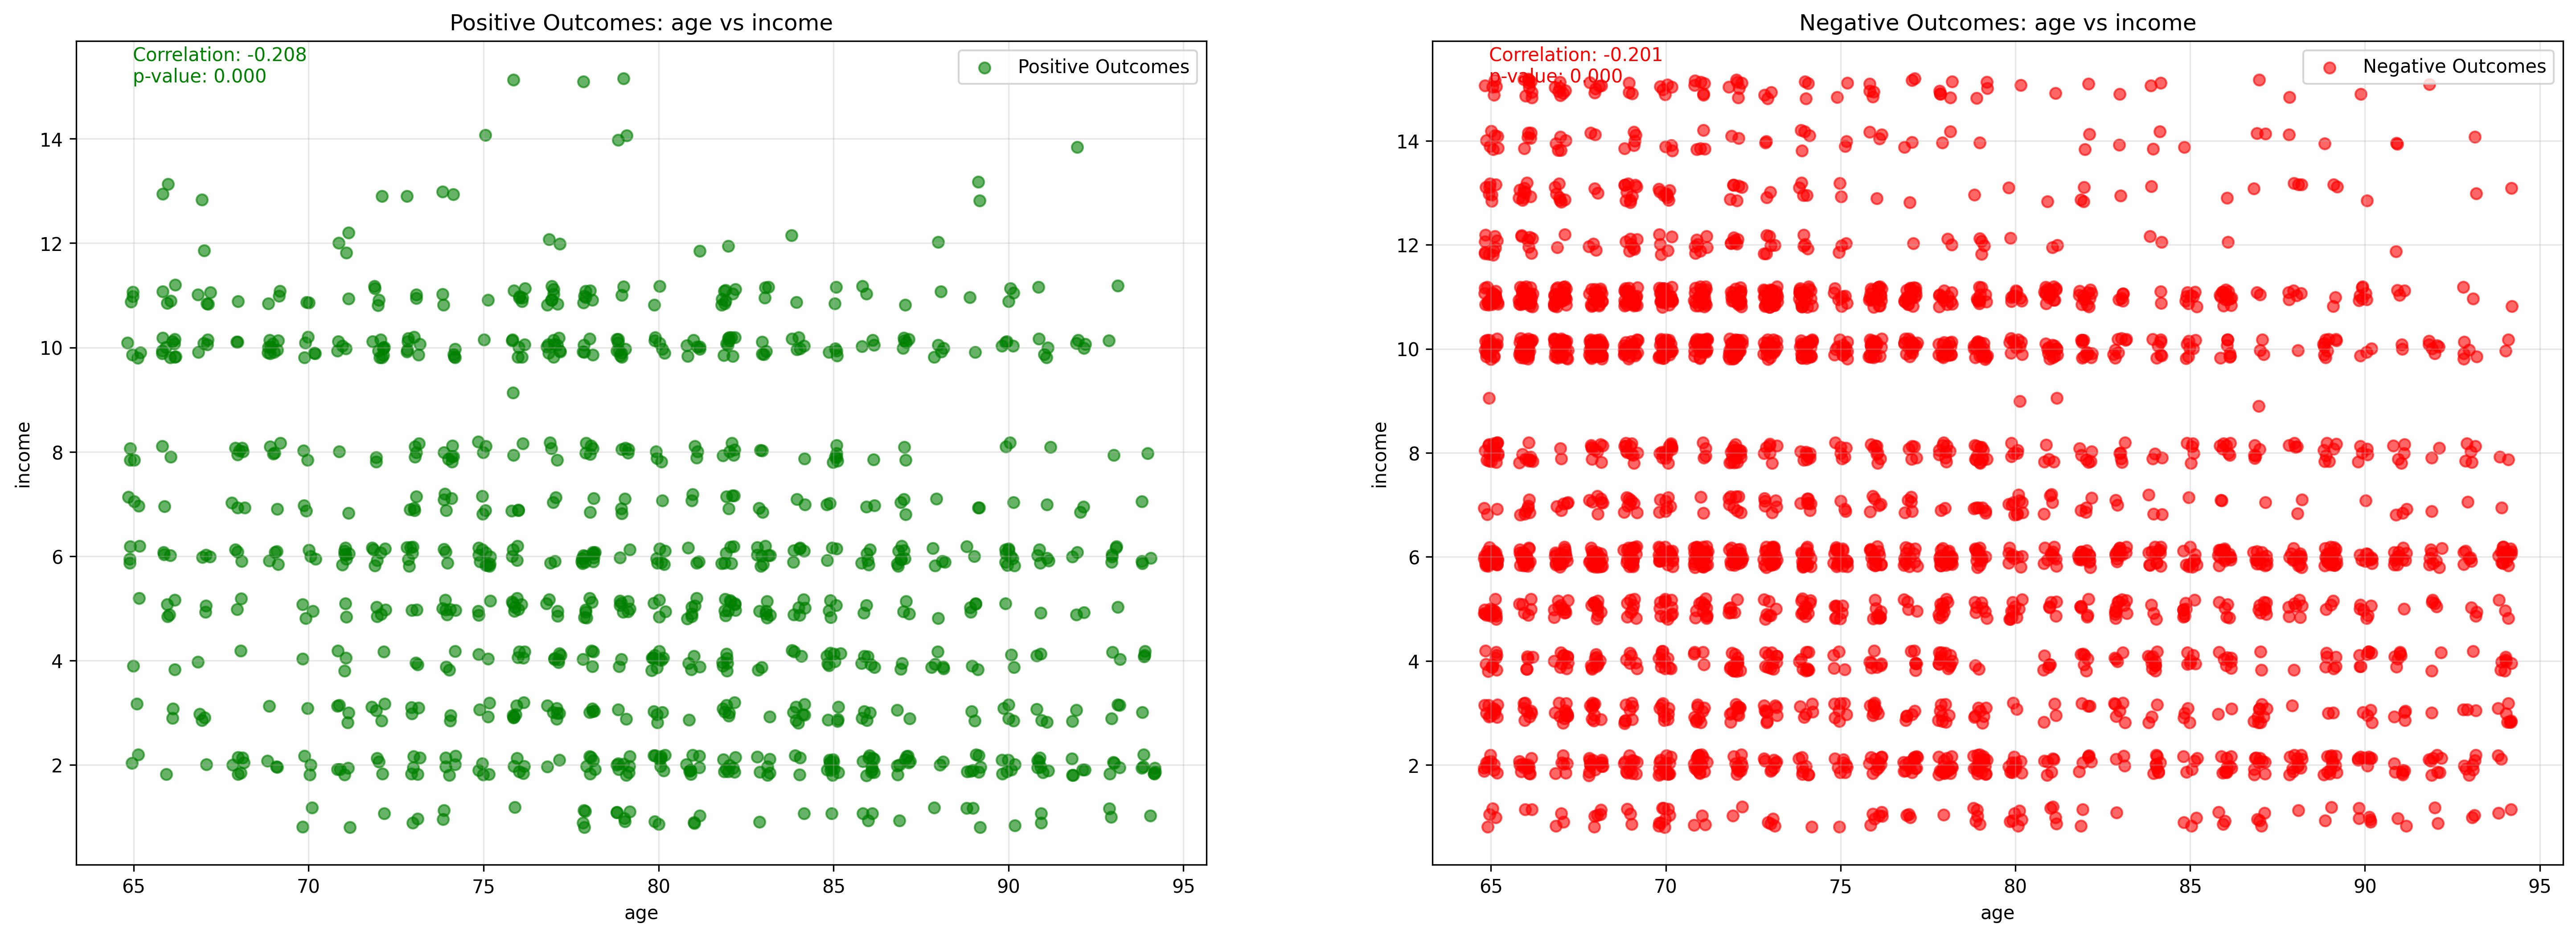

In [223]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

def plot_scatter_with_separate_correlations(df, continuous_vars, target_var='target', positive_value=1, negative_value=0):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 8))
    
    positive_data = df[df[target_var] == positive_value]
    negative_data = df[df[target_var] == negative_value]
    
    pos_corr, pos_p = stats.pearsonr(positive_data[continuous_vars[0]], positive_data[continuous_vars[1]])
    neg_corr, neg_p = stats.pearsonr(negative_data[continuous_vars[0]], negative_data[continuous_vars[1]])
    
    offset = 0.2
    pos_x = positive_data[continuous_vars[0]] + np.random.uniform(-offset, offset, len(positive_data))
    pos_y = positive_data[continuous_vars[1]] + np.random.uniform(-offset, offset, len(positive_data))
    neg_x = negative_data[continuous_vars[0]] + np.random.uniform(-offset, offset, len(negative_data))
    neg_y = negative_data[continuous_vars[1]] + np.random.uniform(-offset, offset, len(negative_data))
    
    ax1.scatter(pos_x, pos_y, color='green', label='Positive Outcomes', alpha=0.6)
    ax2.scatter(neg_x, neg_y, color='red', label='Negative Outcomes', alpha=0.6)
    
    ax1.text(0.05, 0.95, f'Correlation: {pos_corr:.3f}\np-value: {pos_p:.3f}',
             transform=ax1.transAxes, color='green', fontsize=10)
    ax2.text(0.05, 0.95, f'Correlation: {neg_corr:.3f}\np-value: {neg_p:.3f}',
             transform=ax2.transAxes, color='red', fontsize=10)
    
    ax1.set_title(f'Positive Outcomes: {continuous_vars[0]} vs {continuous_vars[1]}')
    ax2.set_title(f'Negative Outcomes: {continuous_vars[0]} vs {continuous_vars[1]}')
    ax1.set_xlabel(continuous_vars[0])
    ax1.set_ylabel(continuous_vars[1])
    ax2.set_xlabel(continuous_vars[0])
    ax2.set_ylabel(continuous_vars[1])
    ax1.legend()
    ax2.legend()
    ax1.grid(True, alpha=0.3)
    ax2.grid(True, alpha=0.3)
    plt.show()

continuous_vars = ['age', 'income']
target_var = 'target'

plot_scatter_with_separate_correlations(data, continuous_vars, target_var, positive_value=1, negative_value=0)

The corelation coeficients are both negative simply because the population is decreasing as age increases.

Again, upon seperating posative and negative outcomes into seperate plots and displaying the numeracy outcomes by offset dots, there fails to be a distiguishable pattern between out best predictor variables and outcomes. 

# conclusions from examination of the data set

1. The predictive power of the predictors are weak individually
2. A strong association between our strongest predictor variables and posative outcomes fails to be visually apparent. 
3. The strongest predictor being age does not appear to have a linear association with posative outcomes, despite the model representing the relationship log(ods) of age linearly. 

# Analysis of Model Performance

The way a Logistic Regression model works is by modeling:
log(p(outcome = 1) / (1 - p(outcome = 1))) = β₁x + β₀

Just as Linear Regression models y = β₁x + β₀, Logistic Regression models the log odds (logit) as a linear function of the predictors.

The Logistic Regression model failed to capture the subtle patterns in our data for several reasons:

1. Non-linear relationships: The relationship between age and positive outcomes is non-linear, with a peak around age 80-85. Logistic Regression assumes a linear relationship in the log odds space.

2. Feature interactions: The model missed important interactions between gender and marital status. For men, being married was highly predictive of a positive response, while marital status had little impact for women.

3. Oversimplified variable relationships: The Logistic Regression model simply predicted highest probabilities for:
   - Maximum age
   - Minimum income 
   - Minimum distance
   - Male gender (1)
   - Married status (1)

In contrast, the Random Forest model identified a more nuanced target demographic:
- Men aged 77-88 who are married
- Women in the same age range (regardless of marital status)
- Income and distance had minimal impact within this demographic

The Random Forest model's superior performance stems from its ability to:
- Handle non-linear relationships
- Capture feature interactions automatically
- Ignore irrelevant variables within specific contexts

This explains why Random Forest achieved 90% of positive responses by targeting only 30% of potential customers, while Logistic Regression required sampling 50% of customers to achieve 70% of positive responses.

# What the trend in the data that predicts response, which Logstic Regression fails to capture

In [224]:
# Get top 10 predictions from logistic regression model
data_sorted_lr = data.copy()
data_sorted_lr['predicted_probs'] = lr_model.predict_proba(X)[:, 1]
data_sorted_lr = data_sorted_lr.sort_values('predicted_probs', ascending=False).head(10)

print("Top feature combinations leading to highest confidence predictions:\n")
print("Top 10 combinations with highest predicted probability:\n")
print(data_sorted_lr[['age', 'income', 'dist', 'gender', 'marital_status', 'predicted_probs']].to_string())


Top feature combinations leading to highest confidence predictions:

Top 10 combinations with highest predicted probability:

      age  income  dist  gender  marital_status  predicted_probs
3917   94       2     1       1               1         0.648037
2393   94       2     2       1               1         0.645123
442    94       2     3       1               1         0.642198
862    90       1     2       1               1         0.627674
460    92       2     1       1               1         0.626457
2151   94       3     0       1               1         0.625239
264    90       1     5       1               1         0.618691
61     93       2     8       1               1         0.616442
1935   94       3     3       1               1         0.616234
31     92       2     7       1               1         0.608387


age       dist     income     gender  marital_status
count  69.000000  69.000000  69.000000  69.000000       69.000000
mean   82.565217   4.231884   5.463768   0.710145        0.811594
std     4.347001   5.401919   2.997939   0.457019        0.393901
min    74.000000   0.000000   1.000000   0.000000        0.000000
25%    79.000000   0.000000   3.000000   0.000000        1.000000
50%    82.000000   2.000000   5.000000   1.000000        1.000000
75%    86.000000   5.000000   8.000000   1.000000        1.000000
max    93.000000  18.000000  11.000000   1.000000        1.000000

predicted_probs    1.000000
age                0.308585
gender             0.106436
marital_status     0.066759
dist              -0.059270
income            -0.232083
Name: predicted_probs, dtype: float64

 age  dist  income  gender  marital_status  predicted_probs
  80    16       4       1               1             0.99
  80    16       4       1               1             0.99
  79     0       2       0               1             0.98
  77     5      11       1               1             0.98
  85     2      10       1               1             0.98
  85     2      10       1               1             0.98
  87     0       7       1               1             0.98
  77     5      11       1               1             0.98
  79     0       2       0               1             0.98
  77     5      11       1               1             0.98


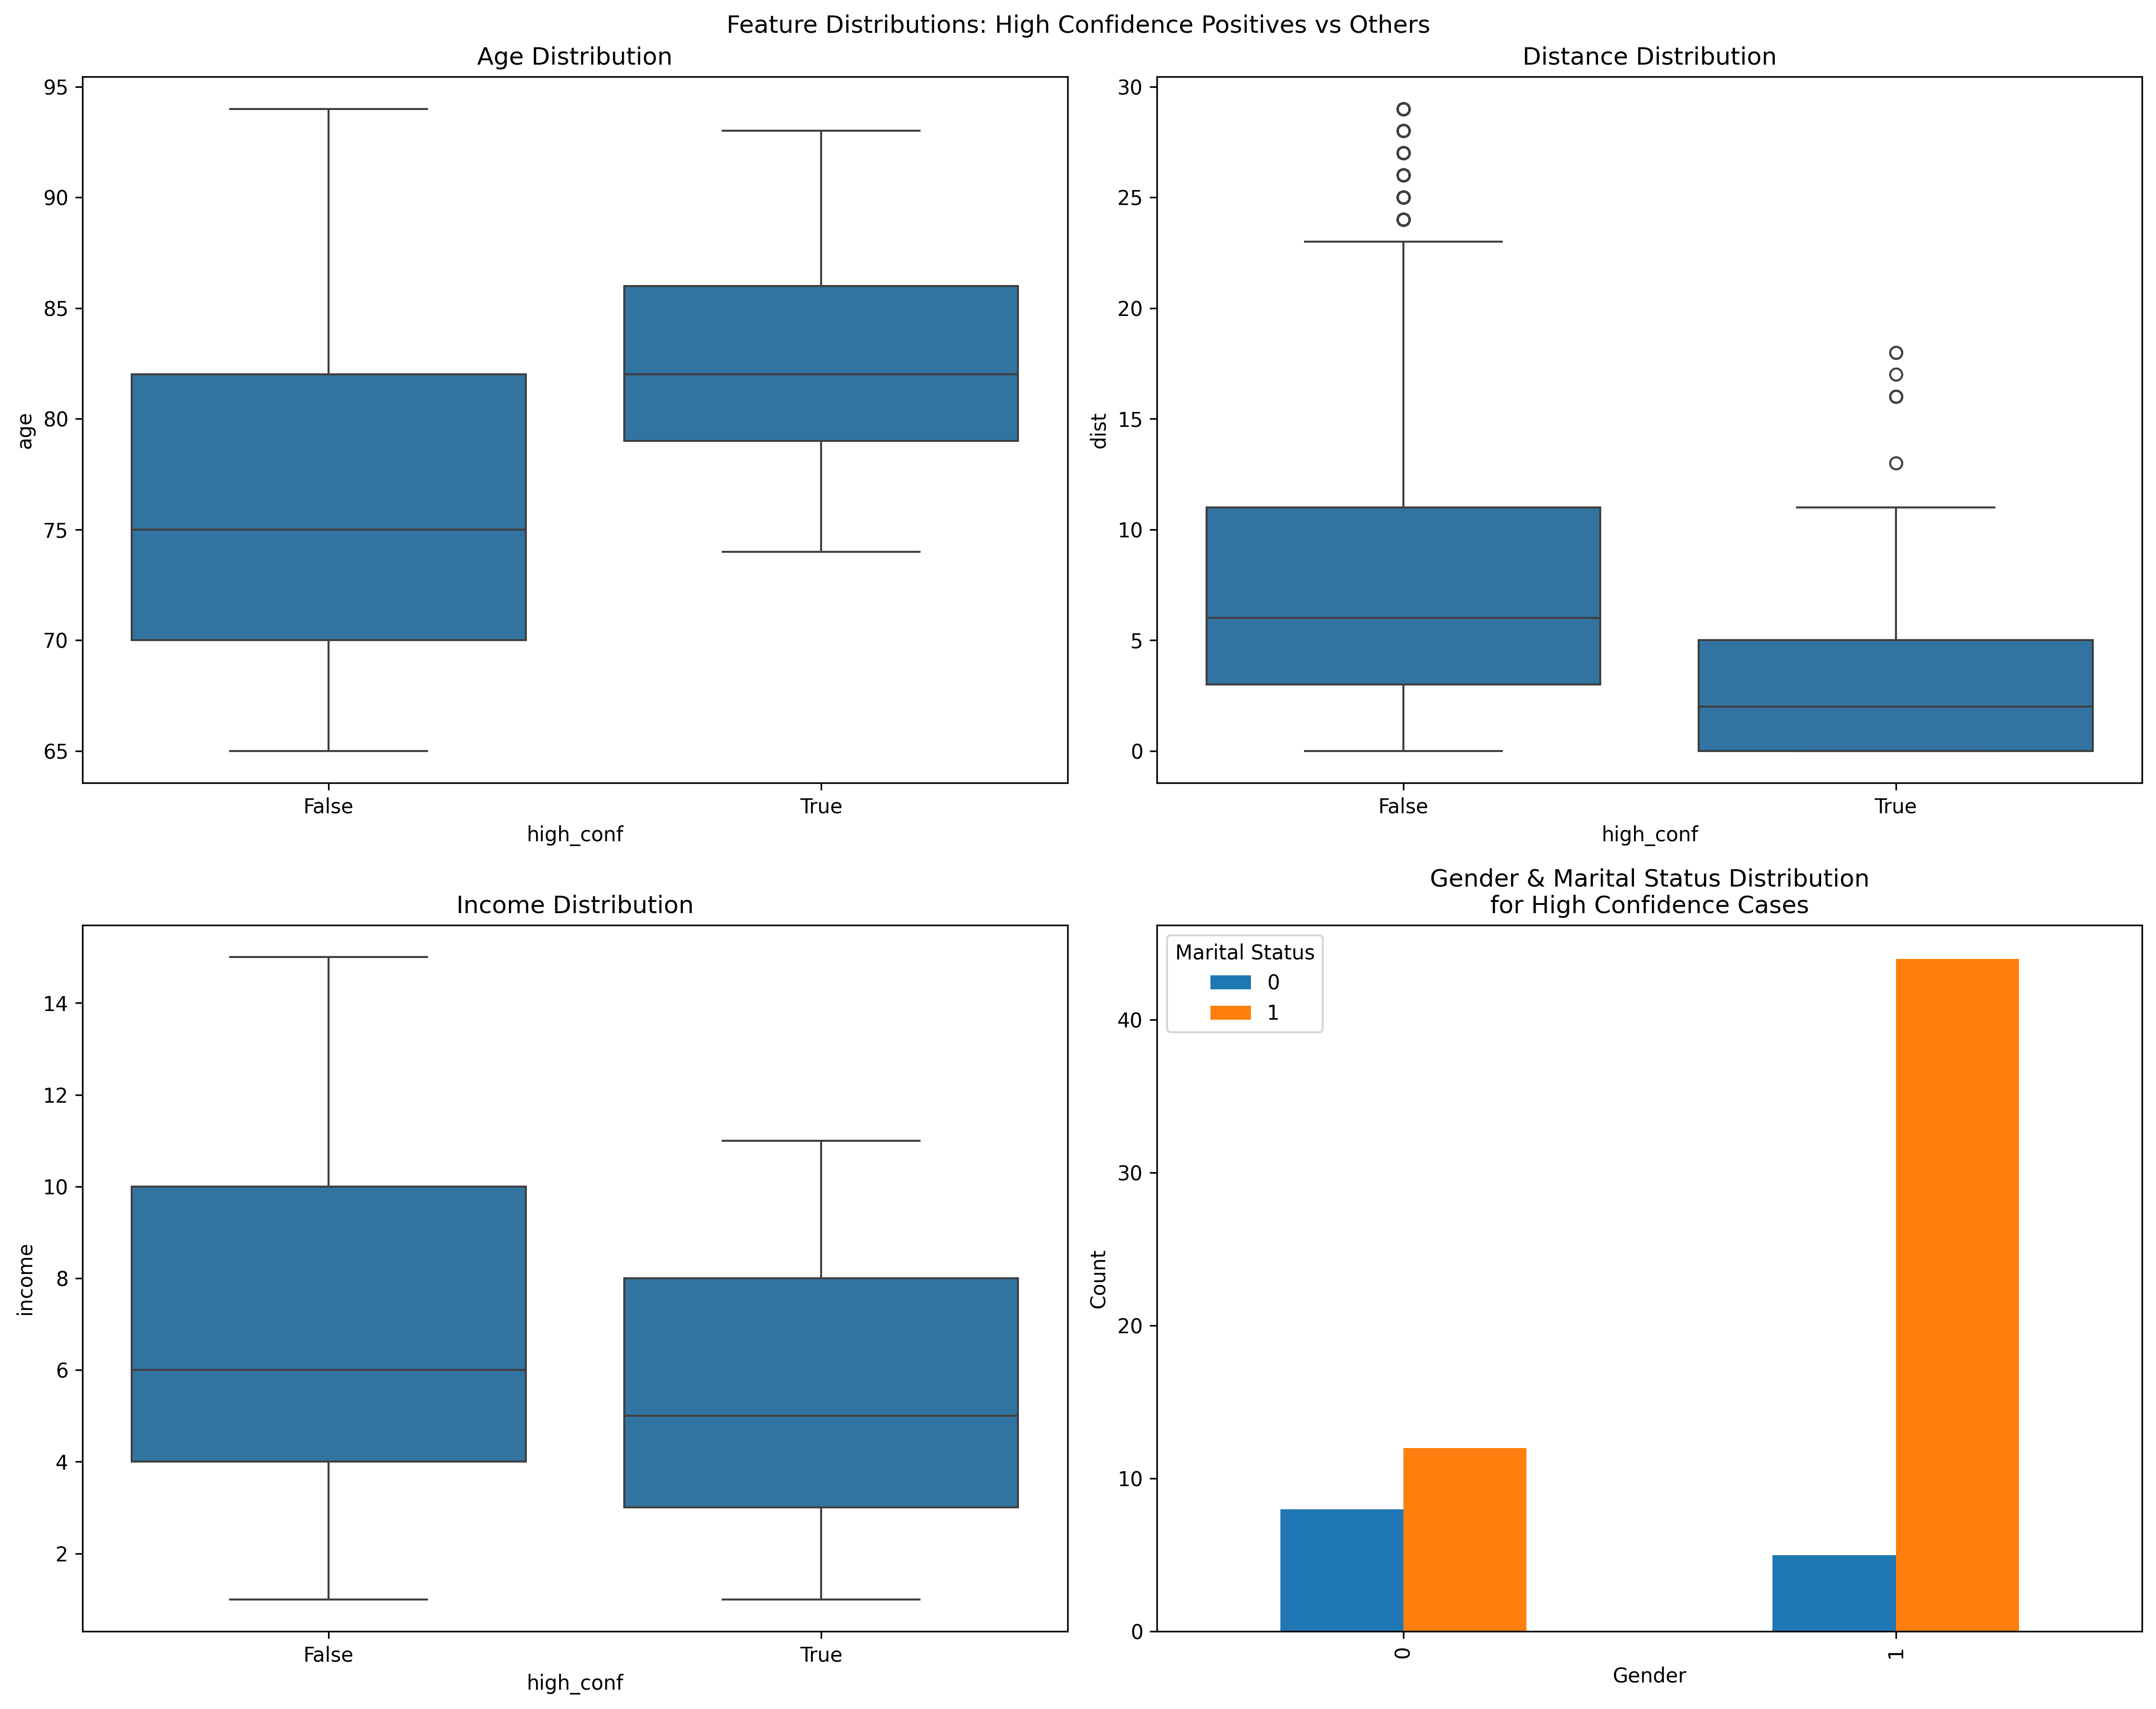

In [225]:
high_confidence_positives = data_sorted[data_sorted['predicted_probs'] > 0.9].copy()

summary_stats = high_confidence_positives[['age', 'dist', 'income', 'gender', 'marital_status']].describe()
display(summary_stats)

correlations = data_sorted[['age', 'dist', 'income', 'gender', 'marital_status', 'predicted_probs']].corr()['predicted_probs'].sort_values(ascending=False)
display(correlations)

high_conf_combos = high_confidence_positives[['age', 'dist', 'income', 'gender', 'marital_status', 'predicted_probs']]
high_conf_combos = high_conf_combos.sort_values('predicted_probs', ascending=False).head(10)
print(high_conf_combos.to_string(index=False))

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Feature Distributions: High Confidence Positives vs Others')

sns.boxplot(x='high_conf', y='age', 
           data=data_sorted.assign(high_conf=data_sorted['predicted_probs'] > 0.9),
           ax=axes[0,0])
axes[0,0].set_title('Age Distribution')

sns.boxplot(x='high_conf', y='dist',
           data=data_sorted.assign(high_conf=data_sorted['predicted_probs'] > 0.9),
           ax=axes[0,1])
axes[0,1].set_title('Distance Distribution')

sns.boxplot(x='high_conf', y='income',
           data=data_sorted.assign(high_conf=data_sorted['predicted_probs'] > 0.9),
           ax=axes[1,0])
axes[1,0].set_title('Income Distribution')

cat_data = data_sorted.assign(high_conf=data_sorted['predicted_probs'] > 0.9)
cat_data = cat_data[cat_data['high_conf']]
gender_marital_counts = pd.crosstab(cat_data['gender'], cat_data['marital_status'])
gender_marital_counts.plot(kind='bar', ax=axes[1,1])
axes[1,1].set_title('Gender & Marital Status Distribution\nfor High Confidence Cases')
axes[1,1].set_xlabel('Gender')
axes[1,1].set_ylabel('Count')
axes[1,1].legend(title='Marital Status')

plt.tight_layout()
plt.show()

This summarizes the top combinations with a probability of positive response greater than 90%, as identified by the Random Forest model.

The pattern is clear. 

The optimal age was 82, this is evident by the plot of proportion of responses that were posative for each age, peaking a little after age 80. 

Distance didn't matter, the 3rd row was the minimum distance while the first 2 rows were at the max distance 

Income did not matter, if you remove the female observations, the min and max is from 4 to 11 which is contains 80% of the distribution of the variable over the entire data set. If you include female observations, even more. 

Gender and matrital status are connected. 

30% of the top 90% predicted prob combinations were women of which marital stats was not signifigant. 

however, 70% of the 90% predicted prob combinations were men of which an insignifigant proportion were unmarried. 

The target demo is precisely married men, aged from 77 to 88. 

## The target demo is precisely married men, aged from 77 to 88. 